<a href="https://colab.research.google.com/github/amandagpereira/Imersao-de-Dados-04/blob/main/Alura_Aula04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
import pandas as pd
import numpy as np

url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

pd.options.display.float_format = '${:,.2f}'.format
dados.head(10)

Rua              Bairro     Cidade  Metragem  \
0           Avenida Itacira, 255    Planalto Paulista  São Paulo      1000   
1  Rua Aurelia Perez Alvarez, 42   Jardim dos Estados  São Paulo       496   
2                 Rua Alba Valdez     Jardim Reimberg  São Paulo       125   
3                             NaN      Jardim Morumbi  São Paulo       310   
4        Rua Tobias Barreto, 195                Mooca  São Paulo       100   
5                 Rua Graham Bell         Santo Amaro  São Paulo       440   
6        Rua Francisco Paulo, 31    Cidade Mãe do Céu  São Paulo       145   
7     Rua Guilherme Valente, 150     Jardim Vergueiro  São Paulo       150   
8         Rua Sagrada Família, 8       Jardim Benfica  São Paulo        48   
9                      Rua Tapaji         Vila Alpina  São Paulo       114   

   Quartos  Banheiros  Vagas         Valor  
0        4          8      6  R$ 7.000.000  
1        4          4      4  R$ 3.700.000  
2        4          3      2    R$ 380.000  
3        3          2      4    R$ 685.000  
4        3          2      2    R$ 540.000  
5        4          4      6  R$ 1.980.000  
6        4          4      2    R$ 850.000  
7        2          2      2    R$ 450.000  
8        2          1      1    R$ 199.900  
9        3          3      2    R$ 585.000

# **Desafios Aula 01**

**Desafio 01:** média da metragem de todos os bairros 

Para isso:
Usar a função groupby que, automaticamente agrupa os dados de acordo com parâmetro, semelhante ao SQL;
pode-se restringir o groupby, para não ser aplicado a valores nulos, com parametro (dropna = False);
parametro axis permite agrupar por linhas;

Importando dados via csv, descobrindo os dados com a função head()

In [143]:
# Desafio 01: média da metragem de todos os bairros
dados.groupby("Bairro")["Metragem"].mean()


Bairro
Aclimação           $253.06
Alto da Boa Vista   $418.88
Alto da Lapa        $294.34
Alto da Mooca       $270.05
Alto de Pinheiros   $433.44
                      ...  
Vila Água Funda     $152.20
Água Branca         $191.00
Água Fria           $165.42
Água Funda          $139.00
Água Rasa           $340.25
Name: Metragem, Length: 701, dtype: float64

**Desafio 02:** duas formas de selecionar os dados por bairro
* primeira forma: loc - a função é responsável por filtrar, sendo que o parametro pode ser uma series de booleanos;
* segunda forma: mais próxima da notação SQL, cujo parâmetro é uma string com os nomes das colunas. Dessa forma, não precisa mencionar sempre o dataframe que será utilizado. Esta notação é mais simples e legível.



---



In [144]:
#Desafio 02: duas formas de selecionar os dados por bairro
parametro_bairro = "Vila Madalena"
dados.loc[(dados['Bairro'] == parametro_bairro)]

dados.query('Bairro == @parametro_bairro')



Rua         Bairro     Cidade  Metragem  \
23             Rua Aldo de Azevedo  Vila Madalena  São Paulo       170   
39    Rua Gregório Paes de Almeida  Vila Madalena  São Paulo       401   
119                Rua dos Tamanás  Vila Madalena  São Paulo       440   
138                            NaN  Vila Madalena  São Paulo       534   
167                     Rua Judith  Vila Madalena  São Paulo       146   
...                            ...            ...        ...       ...   
9326                Rua Alvilândia  Vila Madalena  São Paulo       380   
9396      Rua Professor Nova Gomes  Vila Madalena  São Paulo       407   
9484                           NaN  Vila Madalena  São Paulo       385   
9626                           NaN  Vila Madalena  São Paulo       385   
9649                   Rua Caraúna  Vila Madalena  São Paulo       632   

      Quartos  Banheiros  Vagas         Valor  
23          2          2      1  R$ 1.485.000  
39          5          9      4  R$ 3.890.000  
119         4          5      4  R$ 3.950.000  
138         5          6      5  R$ 4.500.000  
167         3          2      2  R$ 1.550.000  
...       ...        ...    ...           ...  
9326        7          5      2  R$ 2.900.000  
9396        3          6      4  R$ 3.000.000  
9484        7          5      6  R$ 2.900.000  
9626        7          5      6  R$ 2.900.000  
9649        4          5      5  R$ 7.000.000  

[224 rows x 8 columns]

**Desafio 03.1** - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão
* neste primeiro gráfico, procurar pelos bairros da cidade de São Paulo que possuem imóveis com a maior metragem (em média). **Por que?** nos dados não existem informações sobre o período da precificação dos imóveis, porém é sabido que durante a pandemia houve uma procura maior por imóveis com maior metragem, devido a migração das pessoas para o home office, crianças mais tempo em casa, etc - é um dado a ser trabalhado futuramente;
* de toda forma, é necessária a filtragem desses dados devido o bairro Sítio Represa, por exemplo, apresentar uma metragem muito alta em relação aos demais (37.000 m2, em média);
* foi escolhido gráfico do tipo barras horizontais para comparação entre bairros, não foi escolhido barras verticais porque não há análise de tempo (dias, meses, anos);

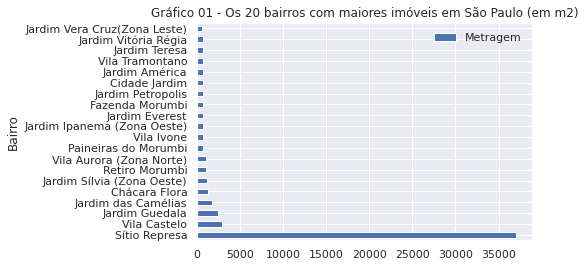

In [145]:
# Desafio 03 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão (Thiago)
dados_grafico_1 = dados.groupby("Bairro")[["Bairro","Metragem","Quartos","Banheiros","Vagas","Valor"]]
dados_grafico_1.mean().sort_values(by = "Metragem", ascending = False).head(20).plot.barh(y = "Metragem", title = "Gráfico 01 - Os 20 bairros com maiores imóveis em São Paulo (em m2)", ylim=(0,40000))


**Desafio 03.2** - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão
* neste segundo gráfico, procurar pelos bairros da cidade de São Paulo que possuem imóveis com maior quantidade de cômodos. Seguindo a mesma temática anterior, nos dados não existem infromações sobre o período da precificação dos imóveis, porém é sabido que durante a pandemia houve uma procura maior por imóveis com maior metragem, devido a migração das pessoas para o home office, crianças mais tempo em casa, etc - é um dado a ser trabalhado futuramente;
* de toda forma, é necessária a filtragem desses dados. Existe relação entre a metragem de um imóvel e a quantidade de cômodos, conforme gráfico anterior? (Verificar posteriormente)
* foi escolhido gráfico do tipo barras horizontais para comparação entre bairros, não foi escolhido barras verticais porque não há análise de tempo (dias, meses, anos);


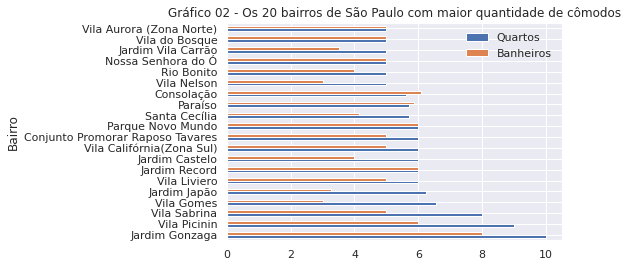

In [146]:
# Desafio 03 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão (Thiago)
dados_grafico_1 = dados.groupby("Bairro")[["Bairro","Quartos","Banheiros","Valor"]]
dados_grafico_1.mean().sort_values(by = "Quartos", ascending = False).head(20).plot.barh(title = "Gráfico 02 - Os 20 bairros de São Paulo com maior quantidade de cômodos", ylim=(0,15))


**Desafio 04** - Pegar outros estatísticas dos dados, média, mediana, mim, max (Vivi)


In [147]:
# Desafio 04.1: mediana da metragem de todos os bairros
dados.groupby("Bairro")["Metragem"].median()

# Desafio 04.2: min da metragem de todos os bairros
dados.groupby("Bairro")["Metragem"].min()

# Desafio 04.2: max da metragem de todos os bairros
dados.groupby("Bairro")["Metragem"].max()

#Outra forma de visualizar os dados mínimo, máximo, média, etc
dados.describe(include = "all")


Rua             Bairro     Cidade    Metragem  \
count                6574               9996      10008  $10,008.00   
unique               3130                701          1         NaN   
top     Rua Alberto Faria  Alto de Pinheiros  São Paulo         NaN   
freq                   24                409      10008         NaN   
mean                  NaN                NaN        NaN     $442.30   
std                   NaN                NaN        NaN   $7,515.38   
min                   NaN                NaN        NaN      $10.00   
25%                   NaN                NaN        NaN     $173.00   
50%                   NaN                NaN        NaN     $290.00   
75%                   NaN                NaN        NaN     $460.25   
max                   NaN                NaN        NaN $750,000.00   

          Quartos  Banheiros      Vagas         Valor  
count  $10,008.00 $10,008.00 $10,008.00         10008  
unique        NaN        NaN        NaN          1041  
top           NaN        NaN        NaN  R$ 2.500.000  
freq          NaN        NaN        NaN           182  
mean        $3.48      $3.88      $4.10           NaN  
std         $1.06      $1.99      $2.82           NaN  
min         $1.00      $1.00      $1.00           NaN  
25%         $3.00      $2.00      $2.00           NaN  
50%         $3.00      $4.00      $4.00           NaN  
75%         $4.00      $5.00      $5.00           NaN  
max        $16.00     $40.00     $50.00           NaN

**Desafio 05** - Descobrir quais são os bairros que não tem nome de Rua. (Vivi)



In [148]:
#Desafio 05 - descobrir quais bairros não tem nome de rua
filtro_nome_rua = [dados.Rua.isnull()]
dados.loc[dados.Rua.isnull()]

Rua                            Bairro     Cidade  Metragem  Quartos  \
3     NaN                    Jardim Morumbi  São Paulo       310        3   
11    NaN                  Jardim Luzitânia  São Paulo       436        4   
31    NaN                    Parque da Lapa  São Paulo       220        4   
56    NaN  Chácara Santo Antônio (Zona Sul)  São Paulo       190        2   
57    NaN                    Jardim Guedala  São Paulo       650        4   
...   ...                               ...        ...       ...      ...   
9963  NaN                 Jardim Petrópolis  São Paulo       423        5   
9989  NaN              Parque Alves de Lima  São Paulo       127        2   
9991  NaN                      Vila Formosa  São Paulo       145        3   
9995  NaN                     Jardim Leonor  São Paulo      1350        5   
9999  NaN                 Jardim Petrópolis  São Paulo       423        5   

      Banheiros  Vagas         Valor  
3             2      4    R$ 685.000  
11            3      3     R$ 15.000  
31            4      3    R$ 849.000  
56            2      2  R$ 1.100.000  
57            6      4  R$ 5.500.000  
...         ...    ...           ...  
9963          7      6  R$ 2.800.000  
9989          1      2    R$ 400.000  
9991          2      3    R$ 750.000  
9995          9      7  R$ 9.500.000  
9999          7      6  R$ 2.800.000  

[3434 rows x 8 columns]

# **Desafios Aula 02**

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tick



**Desafio 01** - Criar uma escala de valores em milhões

Para isso, alterar as configurações do pandas, conforme abaixo:


In [150]:
pd.options.display.float_format = '${:,.2f}'.format

In [151]:
#Creditos: https://dfrieds.com/data-visualizations/how-format-large-tick-values.html

def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

**Desafio 02** - Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Quantidade')

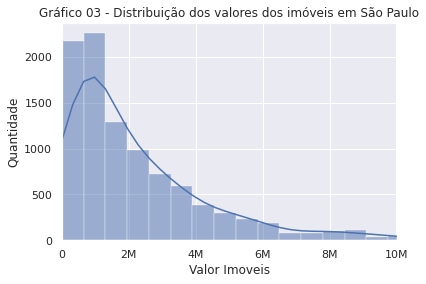

In [152]:
#colunas adicionadas em dados com o valor do imóvel convertido
valor_limpo = dados.Valor.str.extract(r'([0-9.]+)', expand = False)
valor_convertido = valor_limpo.str.replace(r'.','').astype(float)
dados.insert(7,"Valor Imoveis",valor_convertido)

#grafico sem notacao cientifica
plt.ticklabel_format(style = 'plain', useOffset = False)

#kde = calcula a densidade aproximada 
#bins = largura das barras
ax = sns.histplot(data = dados.sort_values(by = "Valor Imoveis"), x = "Valor Imoveis",kde = True, bins = 100)
ax.set_xlim(left = 0, right = 10000000)

#para escala em milhoes, bilhoes, mil
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

ax.set_title("Gráfico 03 - Distribuição dos valores dos imóveis em São Paulo")
ax.set_ylabel("Quantidade")


**Desafio 03** - Preço do metro quadrado por bairro e plotar em um gráfico ideal

O cálculo do metro quadrado por imóvel é feito atraves de "preco_metro_quadrado", onde é divido o preço do valor do imóvel pela metragem. Estes valores são inseridos na coluna "Preco_M2" do df "dados"

Ao criar o primeiro gráfico, optei por um gráfico de barras, para representar a média o preço do metro quadrado por bairro, pois trata-se de dados contínuos.

Problemas: tentei usar a biblioteca seaborn, porém ao plotar o gráfico do tipo histplot, ao tentar usar o index do Datagroup do tipo "maiores_precos_m2", que são textos do tipo "Bairro", sempre fazia a contagem dos bairros, que é sempre 1, pois são dados agrupados. Dessa forma, usei matplotlib.pyplot para chegar em resultados mais satisfatórios.

Conclusões: existem valores discrepantes, tanto nos 50 maiores preços por metro quadrado, quanto nos 50 menores preços por metro quadrado. 

In [153]:
#Descobrir o preco do metro quadrado = valor do imóvel / m2
preco_metro_quadrado = dados["Valor Imoveis"].div(dados["Metragem"])
dados.insert(8,"Preco_M2",preco_metro_quadrado)


Text(0.5, 1.0, 'Gráfico 04 - Os 50 bairros com maiores preços por m2 em São Paulo')

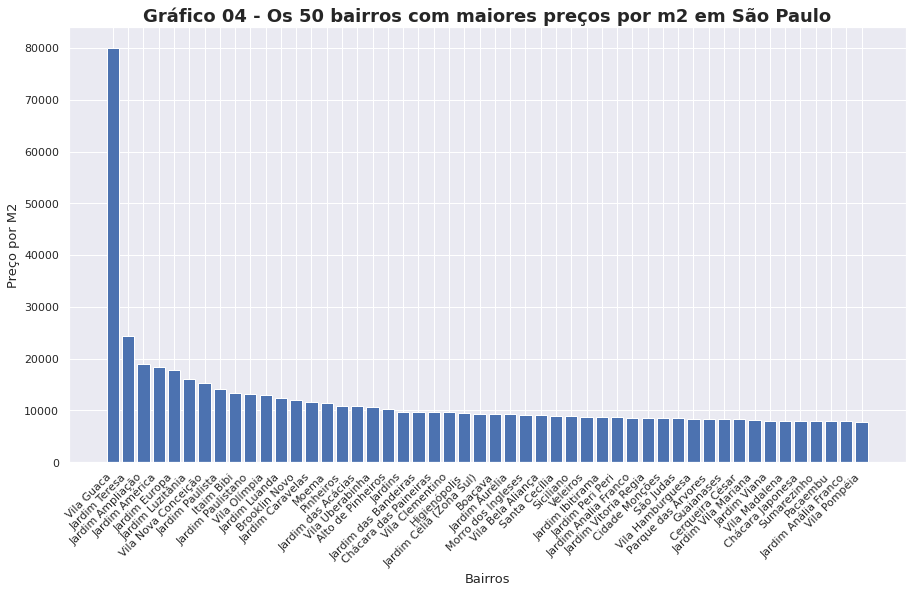

In [154]:
#busca pelos 50 bairros com maiores preços por m2
maiores_precos_m2 = dados.groupby("Bairro").median().sort_values(by = "Preco_M2", ascending = False).head(50)

plt.figure(figsize=(15,8))

#Gráfico de barras - maiores preços por metro quadrado
ax2 = plt.bar(maiores_precos_m2.index, height = maiores_precos_m2["Preco_M2"].astype(float))

#deixar eixo X com interface mais amigável
plt.xticks(rotation=45, ha='right')

plt.xlabel("Bairros", fontdict={'fontsize': 13, 'weight': 'normal'})
plt.ylabel("Preço por M2", fontdict={'fontsize': 13, 'weight': 'normal'})
plt.title("Gráfico 04 - Os 50 bairros com maiores preços por m2 em São Paulo", fontdict={"fontsize": "18", "weight": "bold"})



Metragem  Quartos  Banheiros  Vagas  \
Bairro                                                               
Jardim Domitila                 $202.50    $3.00      $2.00  $4.00   
Vila Noca                       $254.50    $4.00      $4.00  $4.00   
Vila União(Zona Norte)          $102.50    $3.00      $1.00  $1.00   
Consolação                      $452.00    $4.00      $6.00  $5.00   
Sítio Represa                $37,000.00    $4.00      $2.00  $4.00   
Ibirapuera                      $434.00    $4.00      $6.00  $3.00   
Jardim Vera Cruz(Zona Leste)    $642.50    $3.00      $2.00  $5.00   
Jardim Nove de Julho            $520.00    $3.00      $2.00  $2.00   
Vila Aurea                      $182.00    $3.00      $1.00  $2.00   
Jardim Brasília (Zona Leste)    $305.00    $3.00      $2.00  $2.00   

                              Valor Imoveis  Preco_M2  
Bairro                                                 
Jardim Domitila                   $2,500.00    $12.35  
Vila Noca                         $4,000.00    $15.72  
Vila União(Zona Norte)            $1,980.00    $19.33  
Consolação                       $28,000.00    $60.87  
Sítio Represa                 $2,900,000.00    $78.38  
Ibirapuera                       $45,000.00   $103.69  
Jardim Vera Cruz(Zona Leste)    $350,000.00   $544.76  
Jardim Nove de Julho            $450,000.00   $865.38  
Vila Aurea                      $165,000.00   $906.59  
Jardim Brasília (Zona Leste)    $320,000.00 $1,049.18

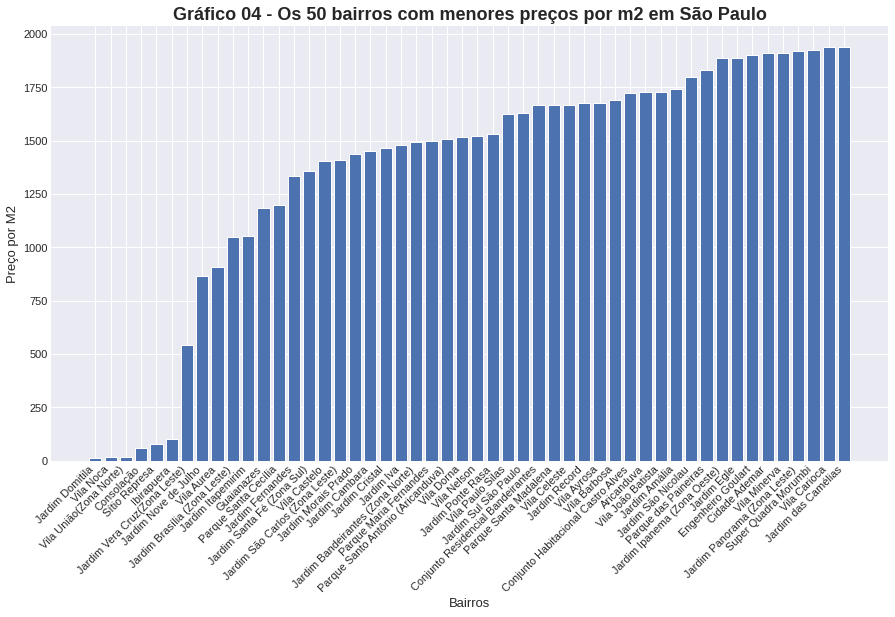

In [155]:
#busca pelos 50 bairros com menores preços por m2
menores_precos_m2 = dados.groupby("Bairro").median().sort_values(by = "Preco_M2", ascending = True).head(50)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,8))

#Gráfico de barras - maiores preços por metro quadrado
ax3 = plt.bar(menores_precos_m2.index, height = menores_precos_m2["Preco_M2"].astype(float))

#deixar eixo X com interface mais amigável
plt.xticks(rotation=45, ha='right')

plt.xlabel("Bairros", fontdict={'fontsize': 13, 'weight': 'normal'})
plt.ylabel("Preço por M2", fontdict={'fontsize': 13, 'weight': 'normal'})
plt.title("Gráfico 04 - Os 50 bairros com menores preços por m2 em São Paulo", fontdict={'fontsize': '18', 'weight': 'bold'})

menores_precos_m2.head(10)

**Desafio 04** - Explorar as bibliotecas de visualizações e colocar as suas conclusões

**Desafio 05** - Pesquisar um visualização para analisar os quartis, mediana e outliers

 - Quartis - o que é?
Quartis dividem uma amostra em quatro partes iguais, para avaliar dispersão e tendencia de uma amostra. 
Primeiro quartil - 25% dos dados são menores ou iguais a este valor;
Segundo quartil - Mediana - 50% dos dados são maiores ou iguais a este valor
Tercerio quartil - 75% dos dados são maiores que este valor.
Amplitude interquartílica - Distancia entre o primeiro e terceiro quartil, ultrapassa o meio dos 50% dos dados.
Mediana e amplitude interquartílica são uma medida da **melhor tendencia central** . (Fonte: https://support.minitab.com/pt-br/minitab/18/help-and-how-to/graphs/how-to/boxplot/interpret-the-results/key-results/)


 - Uma forma simples de descobrir os quartis é com a funcao describe(), outra forma são através dos gráficos do tipo boxplot;
  - Agrupei os dados do tipo Quartos, Banheiros e Vagas, pois tratam de variáveis contínuas do DataFrame menores que 50, neste grupo dos gráficos do tipo boxplot (abaixo) pode-se observar que:
      - Quartos: os dados discrepantes (outliers) são daqueles imóveis que tem menos de 2 quartos e mais que 6 quartos. A média é de 4 quartos;
      - Banheiros: os dados discrepantes (outliers) são daqueles imóveis que tem mais de 10 banheiros. A média é de 4 banheiros;
      - Vagas: os dados discrepantes (outliers) são daqueles imóveis que tem mais de 10 vagas. A média é de 4 vagas por imóvel;
  - O dados do tipo Valor Imoveis pode-se observar que:
      - os dados discrepantes (outliers) são daqueles imóveis cujo valor é acima de 7 milhões. A média é 1,5 milhões;
  - O dados do tipo Metragem pode-se observar que:
      - os dados discrepantes (outliers) são daqueles cuja metragem dos imóveis é acima de 850 m2. A média é 400 m2;

  - **Minhas considerações a respeito**: considerando que a média dos valores dos imóveis em São Paulo é aproximadamente 1,5 milhões, metragem média dos imóveis de 400 m2 e considerando 701 bairros distintos na base, trata-se de uma base de dados de imóveis de alto padrão, voltados para a classe média ou alta? Ou ainda, retirando os dados outliers essa média será alterada?  


In [156]:
dados.describe()

Metragem    Quartos  Banheiros      Vagas  Valor Imoveis   Preco_M2
count  $10,008.00 $10,008.00 $10,008.00 $10,008.00     $10,008.00 $10,008.00
mean      $442.30      $3.48      $3.88      $4.10  $2,794,169.56  $7,326.23
std     $7,515.38      $1.06      $1.99      $2.82  $3,866,248.54  $5,527.42
min        $10.00      $1.00      $1.00      $1.00      $1,650.00      $8.25
25%       $173.00      $3.00      $2.00      $2.00    $750,000.00  $4,242.42
50%       $290.00      $3.00      $4.00      $4.00  $1,600,000.00  $6,153.85
75%       $460.25      $4.00      $5.00      $5.00  $3,350,000.00  $9,047.62
max   $750,000.00     $16.00     $40.00     $50.00 $65,000,000.00 $80,000.00

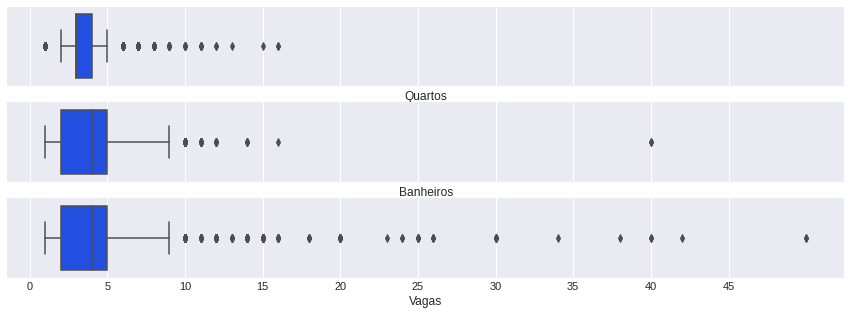

In [157]:
#Paleta de cores
sns.set_palette(sns.color_palette("bright"))

#Graficos do tipo boxplot para visualizacao da distribuição das variaveis continuas do DataFrame:

#Distribuição dos comodos dos imoveis - variacao entre 1 e 50, por isso mesmo grupo de gráficos

#Varios graficos em uma unica figura, serão 3 colunas para 1 linha, sendo que todos os gráficos compartilham o mesmo eixo x (sharex)
fig, axes = plt.subplots(3,1, sharex = True, figsize=(15,5))

for axe in axes:
  axe.set_ylim(0,50)
  axe.set_xticks(np.arange(0, 50, 5)) #eixo x com no máximo 50, de 5 em 5

ax_quarto = sns.boxplot(ax = axes[0],x = dados["Quartos"])
ax_banheiro = sns.boxplot(ax = axes[1],x = dados["Banheiros"])
ax_vaga = sns.boxplot(ax = axes[2],x = dados["Vagas"])


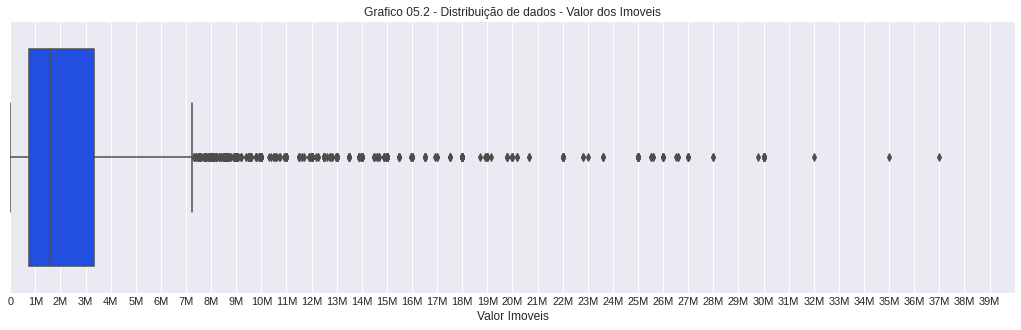

In [158]:
#Graficos do tipo boxplot para visualizacao da distribuição das variaveis continuas do DataFrame:

#Distribuição do valor dos imoveis
axe5 = sns.boxplot(x = dados["Valor Imoveis"].astype(float))
axe5.set_title("Grafico 05.2 - Distribuição de dados - Valor dos Imoveis")
axe5.set_xlim(0,40000000)
axe5.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
axe5.set_xticks(np.arange(0, 40000000, 1000000)) #eixo x com no máximo 40000000, de 1M em 1M
axe5.figure.set_size_inches(18,5)

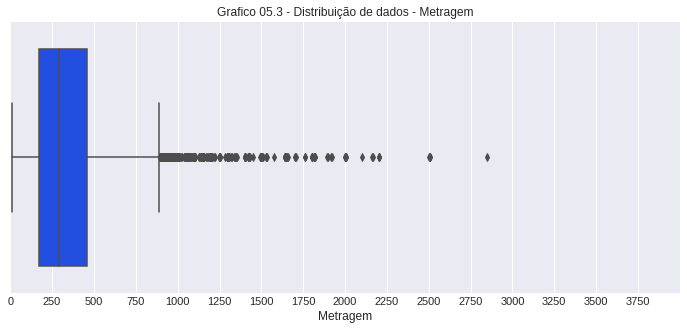

In [159]:
#Graficos do tipo boxplot para visualizacao da distribuição das variaveis continuas do DataFrame:

#Distribuição do metro quadrado dos imoveis
axe6 = sns.boxplot(x = dados["Metragem"].astype(float))
axe6.set_title("Grafico 05.3 - Distribuição de dados - Metragem")
axe6.set_xlim(0,4000)
axe6.set_xticks(np.arange(0, 4000, 250))
axe6.figure.set_size_inches(12,5)

In [160]:
#Contar bairros distintos
dados["Bairro"].nunique() 

701

# **Aula 03**

Desafios: 
- Tratar os outliers e comparar com os resultados.
- Agrupar por mais de uma categoria e realizar as análises.
- Organize o colab para deixar com cara de projeto.
- Tentar vincular dados do IBGE com os dados de imóveis.


(*)
Antes de iniciar, os desafios, uma correção dos meus dados da aula anterior: fazer a soma dos valores por bairro e depois fazer a divisão, da forma que estava fazendo anteriomente era "média de média", além de plotar os gráficos faltantes


In [161]:
#Descobrir o preco do metro quadrado = valor do imóvel / m2
dados_bairro = dados.groupby("Bairro").sum()

#lembrar que o valor do m2 são dados agrupados, não tem como inserir em dados pois são quantidades diferentes!
dados_bairro["Valor_m2_bairro"] = (dados_bairro["Valor Imoveis"]/ dados_bairro["Metragem"]).astype(float)

#resetar index para numerico sequencial
dados_bairro.reset_index(inplace = True)

#bairros com maiores quantidades de anuncios para vendas
top_bairros = dados["Bairro"].value_counts()[:10].index


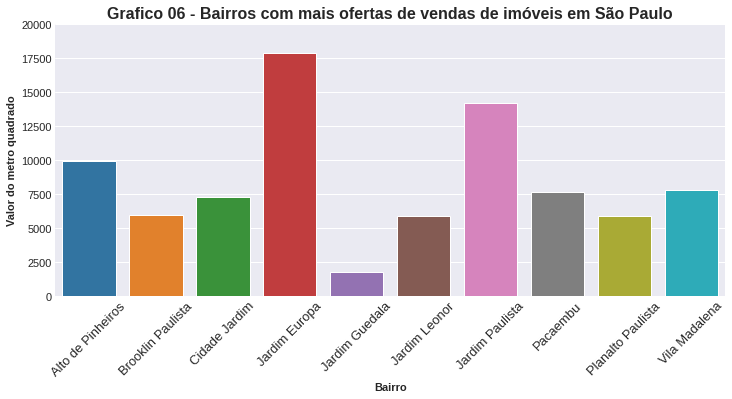

In [162]:
#Gráfico
sns.set_palette(sns.color_palette("tab10"))

#Gráfico de barras - maiores preços por metro quadrado
axe7 = sns.barplot(x = "Bairro", y = "Valor_m2_bairro", data = dados_bairro.query("Bairro in @top_bairros"))
axe7.set_title("Grafico 06 - Bairros com mais ofertas de vendas de imóveis em São Paulo", fontdict={'fontsize':16,'weight':'bold'})
axe7.set_ylim(0,20000)
axe7.set_ylabel("Valor do metro quadrado", fontdict={'fontsize':11,'weight':'bold'})
axe7.set_xlabel("Bairro", fontdict={'fontsize':11,'weight':'bold'})
axe7.tick_params(axis = 'x', rotation = 45, labelsize = 13)
axe7.figure.set_size_inches(12,5)


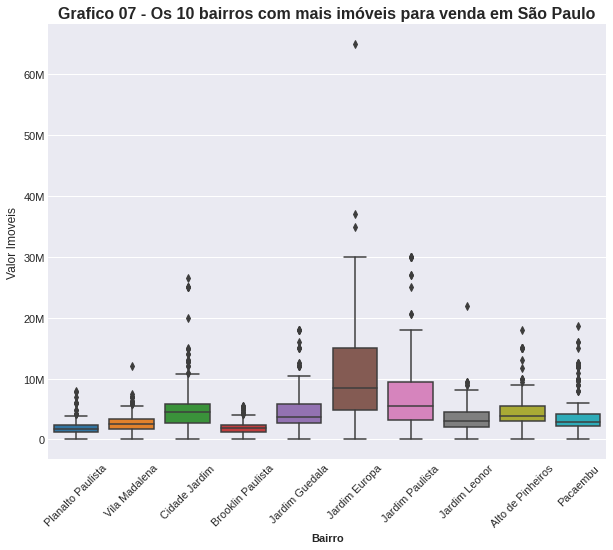

In [163]:
#               Distribuicao dos dados do valor do imóvel, com base nos 10 bairros com mais ofertas de venda
#Paleta de cores
sns.set_palette(sns.color_palette("tab10"))

plt.figure(figsize=(10, 8))
axe8 = sns.boxplot(data = dados.query("Bairro in @top_bairros"), x="Bairro", y="Valor Imoveis")

axe8.set_title("Grafico 07 - Os 10 bairros com mais imóveis para venda em São Paulo", fontdict={'fontsize':16,'weight':'bold'})

#para escala em milhoes, bilhoes, mil
axe8.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
axe8.set_xlabel("Bairro", fontdict={'fontsize':11,'weight':'bold'})

axe8.tick_params(axis='x', rotation=45)
plt.show()

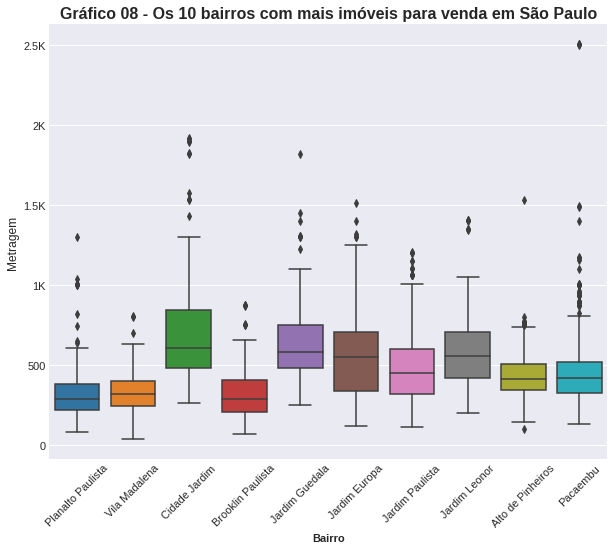

In [164]:
#               Distribuicao dos dados da metragem por imóvel, com base nos 10 bairros com mais ofertas de venda
#Paleta de cores
sns.set_palette(sns.color_palette("tab10"))

plt.figure(figsize=(10, 8))
axe9 = sns.boxplot(data = dados.query("Bairro in @top_bairros & Metragem < 30000"), x="Bairro", y="Metragem")

axe9.set_title("Gráfico 08 - Os 10 bairros com mais imóveis para venda em São Paulo", fontdict={'fontsize':16,'weight':'bold'})

#para escala em milhoes, bilhoes, mil
axe9.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
axe9.set_xlabel("Bairro", fontdict={'fontsize':11,'weight':'bold'})

axe9.tick_params(axis='x', rotation=45)
plt.show()

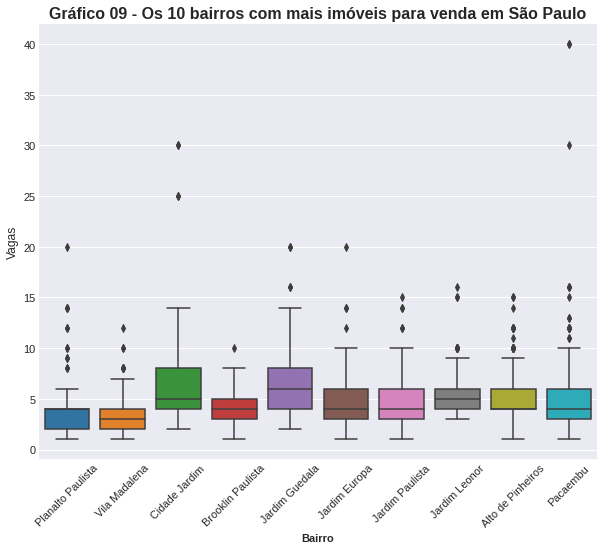

In [165]:
#               Distribuicao dos dados do número de vagas por imóvel, com base nos 10 bairros com mais ofertas de venda
#Paleta de cores
sns.set_palette(sns.color_palette("tab10"))

plt.figure(figsize=(10, 8))
axe10 = sns.boxplot(data = dados.query("Bairro in @top_bairros"), x="Bairro", y="Vagas")

axe10.set_title("Gráfico 09 - Os 10 bairros com mais imóveis para venda em São Paulo", fontdict={'fontsize':16,'weight':'bold'})

#para escala em milhoes, bilhoes, mil
axe10.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
axe10.set_xlabel("Bairro", fontdict={'fontsize':11,'weight':'bold'})

axe10.tick_params(axis='x', rotation=45)
plt.show()

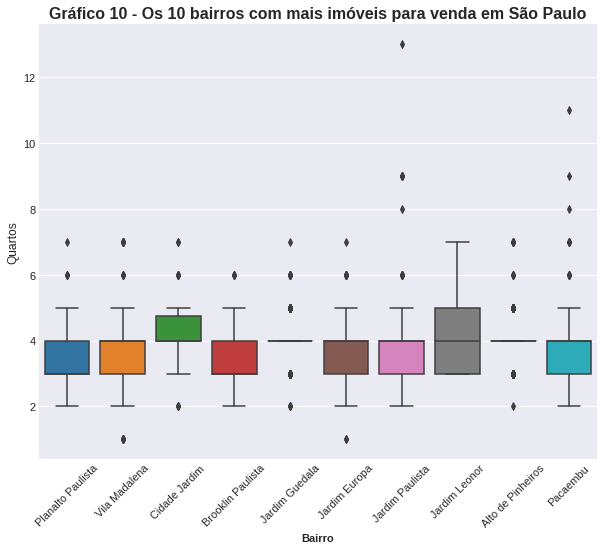

In [166]:
#               Distribuicao dos dados do número de quartos por imóvel, com base nos 10 bairros com mais ofertas de venda
#Paleta de cores
sns.set_palette(sns.color_palette("tab10"))

plt.figure(figsize=(10, 8))
axe11 = sns.boxplot(data = dados.query("Bairro in @top_bairros"), x="Bairro", y="Quartos")

axe11.set_title("Gráfico 10 - Os 10 bairros com mais imóveis para venda em São Paulo", fontdict={'fontsize':16,'weight':'bold'})

#para escala em milhoes, bilhoes, mil
axe11.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
axe11.set_xlabel("Bairro", fontdict={'fontsize':11,'weight':'bold'})

axe11.tick_params(axis='x', rotation=45)
plt.show()

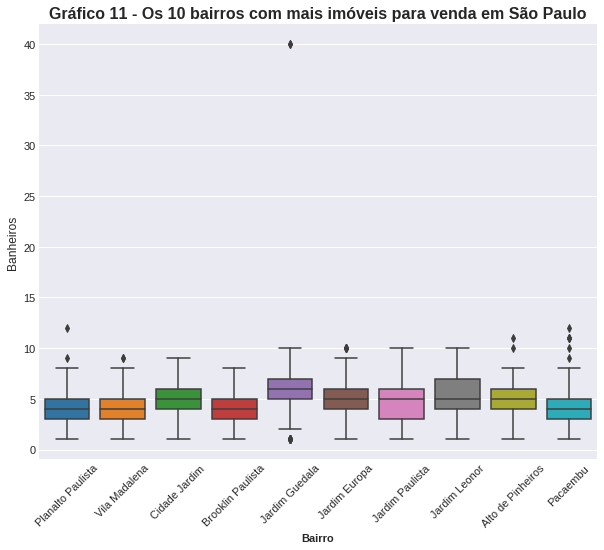

In [167]:
#               Distribuicao dos dados do número de banheiros por imóvel, com base nos 10 bairros com mais ofertas de venda
#Paleta de cores
sns.set_palette(sns.color_palette("tab10"))

plt.figure(figsize=(10, 8))
axe12 = sns.boxplot(data = dados.query("Bairro in @top_bairros"), x="Bairro", y="Banheiros")

axe12.set_title("Gráfico 11 - Os 10 bairros com mais imóveis para venda em São Paulo", fontdict={'fontsize':16,'weight':'bold'})

#para escala em milhoes, bilhoes, mil
axe12.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
axe12.set_xlabel("Bairro", fontdict={'fontsize':11,'weight':'bold'})

axe12.tick_params(axis='x', rotation=45)
plt.show()

# Aula 03
**Desafio 01** - Tentar vincular dados do IBGE com os dados de imóveis.


In [168]:
ibge_url = "https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv"
dados_ibge = pd.read_csv(ibge_url, sep=";",encoding="UTF-8", decimal = ",")

dados_ibge.drop(columns=["Cod_setor", "Cod_Grandes Regi�es",  "Nome_Grande_Regiao",
                "Cod_UF", "Cod_meso", "Nome_da_meso", "Cod_micro", "Nome_da_micro",
                "Cod_RM", "Nome_da_RM", "Cod_municipio", "Cod_distrito",
                "Cod_subdistrito", "Nome_do_subdistrito", "Cod_bairro","Nome_do_bairro",
                "Situacao_setor", "Tipo_setor", "Unnamed: 33", "Nome_do_municipio"],
                inplace=True, axis=1)

Conforme abaixo, os dados possuem problema de codificação, mesmo setando o enconding como UTF-8

In [169]:
dados_ibge

Nome_da_UF  Nome_do_distrito    V001    V002  V003  V004      V005  \
0       S�o Paulo        �GUA RASA $266.00 $800.00 $3.01 $2.32 $2,091.32   
1       S�o Paulo        �GUA RASA $306.00 $913.00 $2.98 $2.09 $1,650.09   
2       S�o Paulo        �GUA RASA $189.00 $625.00 $3.31 $3.08 $1,280.43   
3       S�o Paulo        �GUA RASA $181.00 $572.00 $3.16 $2.26 $1,119.59   
4       S�o Paulo        �GUA RASA $240.00 $754.00 $3.14 $2.35 $1,416.90   
...           ...              ...     ...     ...   ...   ...       ...   
18358   S�o Paulo          LAJEADO  $96.00 $336.00 $3.50 $2.61   $772.09   
18359   S�o Paulo          LAJEADO  $54.00 $209.00 $3.87 $2.49   $692.50   
18360   S�o Paulo          LAJEADO  $87.00 $339.00 $3.90 $2.54   $630.06   
18361   S�o Paulo          LAJEADO  $38.00 $163.00 $4.29 $4.21   $597.37   
18362   S�o Paulo          LAJEADO $123.00 $464.00 $3.77 $3.28   $630.13   

               V006      V007          V008      V009          V010      V011  \
0     $8,532,451.78 $2,164.55 $8,673,276.78 $1,227.41 $4,285,771.99 $1,713.75   
1     $3,983,441.31 $1,717.44 $4,030,519.99 $1,045.78 $2,572,133.32 $1,468.08   
2     $5,474,593.06 $2,349.53 $7,553,913.02   $902.97 $2,735,492.52 $1,786.79   
3     $3,572,955.10 $1,859.13 $4,567,289.50   $869.09 $2,122,409.02 $1,567.41   
4     $2,240,207.58 $1,581.66 $2,240,109.39   $917.71 $1,570,047.75 $1,356.35   
...             ...       ...           ...       ...           ...       ...   
18358   $168,751.10   $814.52   $143,188.21   $467.46   $191,332.48   $699.95   
18359   $239,941.27   $812.93   $182,516.20   $439.33   $194,034.99   $702.10   
18360   $329,705.22   $843.31   $260,395.90   $347.60   $228,162.66   $767.50   
18361   $349,101.00   $908.00   $244,391.67   $397.76   $436,942.16   $854.20   
18362   $183,904.29   $790.88   $102,860.11   $431.82   $186,963.45   $728.70   

               V012  
0     $5,152,087.86  
1     $2,991,546.94  
2     $3,837,674.74  
3     $2,735,383.24  
4     $1,725,877.85  
...             ...  
18358   $123,399.08  
18359   $124,952.38  
18360   $181,129.99  
18361   $550,319.43  
18362    $98,771.74  

[18363 rows x 14 columns]

A forma de tratamento é fazendo replace dos caracteres especiais dos bairros, manualmente



In [170]:
dados_ibge = dados_ibge.replace({'Nome_do_distrito' : 
 {'BEL�M' : 'BELÉM',
  'BRASIL�NDIA' : 'BRASILÂNDIA',
  'BR�S' : 'BRÁS',
  'BUTANT�' : 'BUTANTÃ',
  'CAP�O REDONDO' : 'CAPÃO REDONDO',
  'CARR�O' : 'CARRÃO',
  'CONSOLA��O' : 'CONSOLAÇÃO',
  'FREGUESIA DO �' : 'FREGUESIA DO Ó',
  'GRAJA�' : 'GRAJAÚ',
  'JAGUAR�' : 'JAGUARÉ',
  'JARAGU�' : 'JARAGUÁ',
  'JARDIM S�O LU�S' : 'JARDIM SÃO LUÍS',
  'JARDIM �NGELA' : 'JARDIM ÂNGELA',
  'JA�AN�' : 'JAÇANÃ',
  'JOS� BONIF�CIO' : 'JOSÉ BONIFÁCIO',
  'LIM�O' : 'LIMÃO',
  'REP�BLICA' : 'REPÚBLICA',
  'SACOM�' : 'SACOMÃ',
  'SANTA CEC�LIA' : 'SANTA CECÍLIA',
  'SA�DE' : 'SAÚDE',
  'S�' : 'SÉ',
  'S�O DOMINGOS' : 'VILA SÃO DOMINGOS',
  'S�O LUCAS' : 'SÃO LUCAS',
  'S�O MATEUS' : 'SÃO MATEUS',
  'S�O MIGUEL' : 'SÃO MIGUEL',
  'S�O RAFAEL' : 'SÃO RAFAEL',
  'TATUAP�' : 'TATUAPÉ',
  'TREMEMB�' : 'TREMEMBÉ',
  'VILA CURU��' : 'VILA CURUÇÁ',
  'VILA JACU�' : 'VILA JACUÍ',
  'VILA S�NIA' : 'VILA SÔNIA',
  '�GUA RASA' : 'ÁGUA RASA'}})


In [171]:
dados_ibge = dados_ibge.replace({"Nome_da_UF":{"S�o Paulo": "São Paulo"}})
dados_ibge

Nome_da_UF  Nome_do_distrito    V001    V002  V003  V004      V005  \
0       S�o Paulo        ÁGUA RASA $266.00 $800.00 $3.01 $2.32 $2,091.32   
1       S�o Paulo        ÁGUA RASA $306.00 $913.00 $2.98 $2.09 $1,650.09   
2       S�o Paulo        ÁGUA RASA $189.00 $625.00 $3.31 $3.08 $1,280.43   
3       S�o Paulo        ÁGUA RASA $181.00 $572.00 $3.16 $2.26 $1,119.59   
4       S�o Paulo        ÁGUA RASA $240.00 $754.00 $3.14 $2.35 $1,416.90   
...           ...              ...     ...     ...   ...   ...       ...   
18358   S�o Paulo          LAJEADO  $96.00 $336.00 $3.50 $2.61   $772.09   
18359   S�o Paulo          LAJEADO  $54.00 $209.00 $3.87 $2.49   $692.50   
18360   S�o Paulo          LAJEADO  $87.00 $339.00 $3.90 $2.54   $630.06   
18361   S�o Paulo          LAJEADO  $38.00 $163.00 $4.29 $4.21   $597.37   
18362   S�o Paulo          LAJEADO $123.00 $464.00 $3.77 $3.28   $630.13   

               V006      V007          V008      V009          V010      V011  \
0     $8,532,451.78 $2,164.55 $8,673,276.78 $1,227.41 $4,285,771.99 $1,713.75   
1     $3,983,441.31 $1,717.44 $4,030,519.99 $1,045.78 $2,572,133.32 $1,468.08   
2     $5,474,593.06 $2,349.53 $7,553,913.02   $902.97 $2,735,492.52 $1,786.79   
3     $3,572,955.10 $1,859.13 $4,567,289.50   $869.09 $2,122,409.02 $1,567.41   
4     $2,240,207.58 $1,581.66 $2,240,109.39   $917.71 $1,570,047.75 $1,356.35   
...             ...       ...           ...       ...           ...       ...   
18358   $168,751.10   $814.52   $143,188.21   $467.46   $191,332.48   $699.95   
18359   $239,941.27   $812.93   $182,516.20   $439.33   $194,034.99   $702.10   
18360   $329,705.22   $843.31   $260,395.90   $347.60   $228,162.66   $767.50   
18361   $349,101.00   $908.00   $244,391.67   $397.76   $436,942.16   $854.20   
18362   $183,904.29   $790.88   $102,860.11   $431.82   $186,963.45   $728.70   

               V012  
0     $5,152,087.86  
1     $2,991,546.94  
2     $3,837,674.74  
3     $2,735,383.24  
4     $1,725,877.85  
...             ...  
18358   $123,399.08  
18359   $124,952.38  
18360   $181,129.99  
18361   $550,319.43  
18362    $98,771.74  

[18363 rows x 14 columns]

In [172]:
dados.rename(columns = {"Valor Imoveis" : "Valor_Imoveis"}, inplace = True)

**Desafio 02 -** Tratar os outliers e comparar com os resultados.

O tratamento dos outliers foi feito através de query, para não excluir os dados originais

Conforme analises anteriores, no gráfico 06, os bairros com maiores ofertas são: 'Alto de Pinheiros', 'Jardim Guedala', 'Jardim Paulista', 'Brooklin Paulista', 'Jardim Europa', 'Cidade Jardim', 'Vila Madalena', 'Pacaembu', 'Planalto Paulista', 'Jardim Leonor'. 
Através dos gráficos do tipo boxplot (gráficos 07, 08, 09 e 10) foi possível verificar que os outliers são:
  - metragem acima de 1250 m2;
  - valor do imóvel acima de 30M;
  - vagas na garagem acima de 12;
  - quartos acima de 7;
  - banheiros acima de 10

Filtrando estes outliers, o bairro "Vila Mariana" apareceu na lista como um dos bairros com maior oferta de imóveis.

In [173]:
#Limpeza dos dados 
dados_limpos = dados.query("Metragem < 1250 & Valor_Imoveis < 30000000 & Quartos < 7 & Vagas < 12 & Banheiros < 10 & Rua == Rua") 
#Rua == Rua é a mesma coisa que is not null

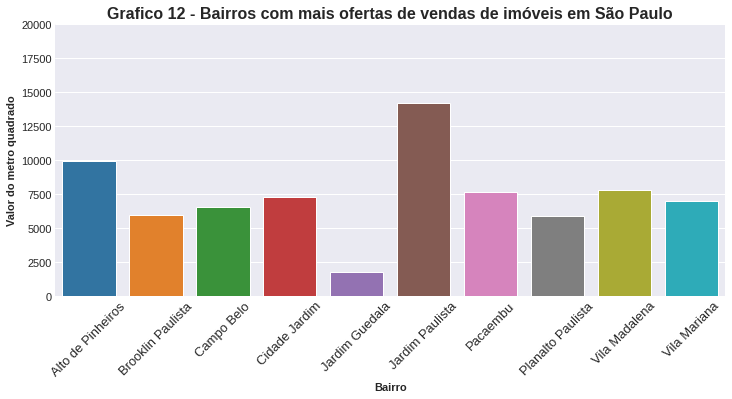

In [174]:

top_bairros_filtro = dados_limpos["Bairro"].value_counts()[:10].index

axe13 = sns.barplot(x = "Bairro", y = "Valor_m2_bairro", data = dados_bairro.query("Bairro in @top_bairros_filtro"))

axe13.set_title("Grafico 12 - Bairros com mais ofertas de vendas de imóveis em São Paulo", fontdict={'fontsize':16,'weight':'bold'})
axe13.set_ylim(0,20000)
axe13.set_ylabel("Valor do metro quadrado", fontdict={'fontsize':11,'weight':'bold'})
axe13.set_xlabel("Bairro", fontdict={'fontsize':11,'weight':'bold'})
axe13.tick_params(axis = 'x', rotation = 45, labelsize = 13)
axe13.figure.set_size_inches(12,5)


**Desafio 03** - Agrupar por mais de uma categoria e realizar as análises.

Os dados foram agrupados por Bairro, Vagas, Banheiros, Quartos (dados discretos) e a foi feita a mediana do Valor e a mediana da Metragem desses imóveis.

Alguns questionamentos, a partir desse agrupamento de dados:

- 03.1 Existe relação entre a metragem de um imóvel e o valor?
  - existe uma correlação forte (Gráfico 13) para imóveis até 10M e metragem de 600 m2, ou seja, o valor de um imóvel é proporcional ao tamanho daquele imóvel;




In [175]:

bairros_valor = (dados_limpos.groupby(["Bairro","Quartos", "Vagas"]).agg({"Valor_Imoveis": "median", "Metragem":"median"})).sort_values(["Bairro", "Metragem"], ascending = [False, False])
bairros_valor.reset_index(inplace = True)
bairros_valor


Bairro  Quartos  Vagas  Valor_Imoveis  Metragem
0     Água Rasa        6     10     $15,000.00   $802.50
1     Água Rasa        2      3    $625,000.00   $341.00
2     Água Rasa        3      4    $745,000.00   $180.00
3     Água Rasa        3      3    $790,000.00   $150.00
4     Água Fria        3      3  $1,195,000.00   $314.00
...         ...      ...    ...            ...       ...
2238  Aclimação        3      6  $1,525,000.00   $190.00
2239  Aclimação        3      1  $1,200,000.00   $165.00
2240  Aclimação        4      1  $1,300,000.00   $142.50
2241  Aclimação        2      2  $1,100,000.00   $130.00
2242  Aclimação        3      8  $1,250,000.00   $122.50

[2243 rows x 5 columns]

In [176]:
vila_mariana = bairros_valor.query("Bairro == 'Vila Mariana'")
vila_mariana.head(10)

Bairro  Quartos  Vagas  Valor_Imoveis  Metragem
333  Vila Mariana        4      8  $3,200,000.00   $650.00
334  Vila Mariana        4      5  $4,000,000.00   $500.00
335  Vila Mariana        5      8  $6,500,000.00   $470.00
336  Vila Mariana        4      1  $1,300,000.00   $400.00
337  Vila Mariana        6     10  $1,700,000.00   $350.00
338  Vila Mariana        1      3  $2,000,000.00   $340.00
339  Vila Mariana        4      6  $2,370,000.00   $328.00
340  Vila Mariana        6      8  $1,800,000.00   $320.00
341  Vila Mariana        6      2  $1,600,000.00   $300.00
342  Vila Mariana        4      4  $2,095,000.00   $290.00

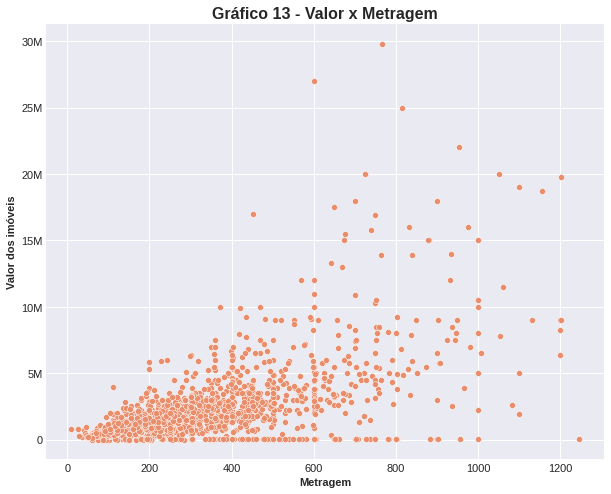

In [177]:
#Paleta de cores
sns.set_palette(sns.color_palette("flare"))

#       Gráfico para descobrir a relação entre o preço de um imóvel e a metragem
plt.figure(figsize=(10, 8))
axe12 = sns.scatterplot(data = bairros_valor, x = "Metragem", y = "Valor_Imoveis")
axe12.set_title("Gráfico 13 - Valor x Metragem", fontdict={'fontsize':16,'weight':'bold'})
axe12.set_xlabel("Metragem", fontdict={'fontsize':11,'weight':'bold'})
axe12.set_ylabel("Valor dos imóveis", fontdict={'fontsize':11,'weight':'bold'})
#para escala em milhoes, bilhoes, mil
axe12.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

# **Aula 04**



In [178]:
import pandas as pd
ibge_sp = pd.read_csv(
    'https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv',
    encoding='ISO-8859-1',
    sep=';', thousands='.', decimal=','
)
ibge_sp.dropna(how='all', axis=1, inplace=True)
ibge_sp.head()

Cod_setor  Cod_Grandes Regiï¿½es Nome_Grande_Regiao  Cod_UF  \
0  355030801000001                      3   Regiï¿½o Sudeste      35   
1  355030801000002                      3   Regiï¿½o Sudeste      35   
2  355030801000003                      3   Regiï¿½o Sudeste      35   
3  355030801000004                      3   Regiï¿½o Sudeste      35   
4  355030801000005                      3   Regiï¿½o Sudeste      35   

   Nome_da_UF   Cod_meso                  Nome_da_meso  Cod_micro  \
0  Sï¿½o Paulo      3515  Metropolitana de Sï¿½o Paulo      35061   
1  Sï¿½o Paulo      3515  Metropolitana de Sï¿½o Paulo      35061   
2  Sï¿½o Paulo      3515  Metropolitana de Sï¿½o Paulo      35061   
3  Sï¿½o Paulo      3515  Metropolitana de Sï¿½o Paulo      35061   
4  Sï¿½o Paulo      3515  Metropolitana de Sï¿½o Paulo      35061   

  Nome_da_micro  Cod_RM  ...  V003  V004      V005          V006      V007  \
0   Sï¿½o Paulo      20  ... $3.01 $2.32 $2,091.32 $8,532,451.78 $2,164.55   
1   Sï¿½o Paulo      20  ... $2.98 $2.09 $1,650.09 $3,983,441.31 $1,717.44   
2   Sï¿½o Paulo      20  ... $3.31 $3.08 $1,280.43 $5,474,593.06 $2,349.53   
3   Sï¿½o Paulo      20  ... $3.16 $2.26 $1,119.59 $3,572,955.10 $1,859.13   
4   Sï¿½o Paulo      20  ... $3.14 $2.35 $1,416.90 $2,240,207.58 $1,581.66   

           V008      V009          V010      V011          V012  
0 $8,673,276.78 $1,227.41 $4,285,771.99 $1,713.75 $5,152,087.86  
1 $4,030,519.99 $1,045.78 $2,572,133.32 $1,468.08 $2,991,546.94  
2 $7,553,913.02   $902.97 $2,735,492.52 $1,786.79 $3,837,674.74  
3 $4,567,289.50   $869.09 $2,122,409.02 $1,567.41 $2,735,383.24  
4 $2,240,109.39   $917.71 $1,570,047.75 $1,356.35 $1,725,877.85  

[5 rows x 33 columns]

In [179]:
enderecos = pd.read_csv("/content/drive/MyDrive/Alura - Imersao04/enderecos.csv")
enderecos.head(10)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


tipo_logr                      logr_nome  \
0       Rua               Armando Silveira   
1       Rua       João Antônio Vasconcelos   
2       Rua  Prefeito Agenor Barcelos Feio   
3       Rua                Sebastião Gomes   
4       Rua            Marquês do Alegrete   
5       Rua    Prefeito João Jacinto Costa   
6       Rua          Vitorino Soares Pinto   
7       Rua                    Zeca Vieira   
8       Rua                      José Lupi   
9       Rua                João José Lopes   

                                        logr_compl numero            bairro  \
0                             Rua Armando Silveira    NaN            Divisa   
1       Rua João Antônio Vasconcelos - até 627/628    627           Amizade   
2                Rua Prefeito Agenor Barcelos Feio    NaN          Registro   
3                  Rua Sebastião Gomes - até 59/60     59          Registro   
4                          Rua Marquês do Alegrete    NaN  Parque das Águas   
5                  Rua Prefeito João Jacinto Costa    NaN              Real   
6  Rua Vitorino Soares Pinto - de 1161/1162 ao fim   1161             Prado   
7                     Rua Zeca Vieira - lado ímpar      l            Batuva   
8                                    Rua José Lupi    NaN            Divisa   
9                              Rua João José Lopes    NaN            Divisa   

         nome_localidade sigla_uf            cep  latitude  longitude  
0  Santana do Livramento       RS $97,573,200.00   $-30.88    $-55.55  
1              Araçatuba       SP $16,074,320.00   $-21.19    $-50.45  
2  Santana do Livramento       RS $97,571,090.00   $-30.86    $-55.56  
3  Santana do Livramento       RS $97,571,374.00   $-30.86    $-55.55  
4  Santana do Livramento       RS $97,571,500.00   $-30.86    $-55.55  
5  Santana do Livramento       RS $97,572,050.00   $-30.86    $-55.53  
6  Santana do Livramento       RS $97,572,216.00   $-30.88    $-55.53  
7  Santana do Livramento       RS $97,572,092.00   $-30.87    $-55.52  
8  Santana do Livramento       RS $97,573,270.00   $-30.88    $-55.54  
9  Santana do Livramento       RS $97,573,280.00   $-30.88    $-55.54

In [180]:
enderecos_sp = enderecos.query("sigla_uf == 'SP'")
enderecos_sp

tipo_logr                  logr_nome  \
1             Rua   João Antônio Vasconcelos   
413269        Rua                          A   
413270        Rua                          A   
413271        Rua                          A   
413272        Rua               João Bandini   
...           ...                        ...   
1113858       Rua            Daniel Buccieri   
1113865       Rua             Ottorino Rizzi   
1113873       Rua  Adriano Michelutti Cândia   
1113882   Rodovia              Mario Tonolli   
1113884       Rua                 Tiradentes   

                                         logr_compl numero  \
1        Rua João Antônio Vasconcelos - até 627/628    627   
413269                                        Rua A    NaN   
413270                                        Rua A    NaN   
413271                                        Rua A    NaN   
413272                             Rua João Bandini    NaN   
...                                             ...    ...   
1113858                         Rua Daniel Buccieri    NaN   
1113865                          Rua Ottorino Rizzi    NaN   
1113873               Rua Adriano Michelutti Cândia    NaN   
1113882                       Rodovia Mario Tonolli    NaN   
1113884  Rua Tiradentes - de 181 a 369 - lado ímpar    181   

                         bairro nome_localidade sigla_uf            cep  \
1                       Amizade       Araçatuba       SP $16,074,320.00   
413269            Jardim Glória       Americana       SP $13,468,220.00   
413270         Jardim São Roque       Americana       SP $13,469,414.00   
413271   Iate Clube de Campinas       Americana       SP $13,475,620.00   
413272            Jardim Miriam       Americana       SP $13,469,072.00   
...                         ...             ...      ...            ...   
1113858         Jardim Alvorada       Monte Mor       SP $13,198,524.00   
1113865              Royal Park  Ribeirão Preto       SP $14,028,563.00   
1113873     Jardim San Marco II  Ribeirão Preto       SP $14,035,198.00   
1113882              Morro Alto         Itupeva       SP $13,297,002.00   
1113884            Vila Queiroz  Artur Nogueira       SP $13,163,000.00   

         latitude  longitude  
1         $-21.19    $-50.45  
413269    $-22.76    $-47.34  
413270    $-22.74    $-47.35  
413271    $-22.74    $-47.33  
413272    $-22.74    $-47.35  
...           ...        ...  
1113858   $-22.93    $-47.27  
1113865   $-21.24    $-47.83  
1113873   $-21.20    $-47.74  
1113882   $-23.19    $-47.08  
1113884   $-22.58    $-47.17  

[298124 rows x 10 columns]

In [181]:
enderecos_sp["rua"] = enderecos_sp["tipo_logr"] + " " + enderecos_sp["logr_nome"]
enderecos_sp["rua"] = enderecos_sp["rua"].str.lower().str.strip()
enderecos_sp.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


tipo_logr                 logr_nome  \
1            Rua  João Antônio Vasconcelos   
413269       Rua                         A   
413270       Rua                         A   
413271       Rua                         A   
413272       Rua              João Bandini   

                                        logr_compl numero  \
1       Rua João Antônio Vasconcelos - até 627/628    627   
413269                                       Rua A    NaN   
413270                                       Rua A    NaN   
413271                                       Rua A    NaN   
413272                            Rua João Bandini    NaN   

                        bairro nome_localidade sigla_uf            cep  \
1                      Amizade       Araçatuba       SP $16,074,320.00   
413269           Jardim Glória       Americana       SP $13,468,220.00   
413270        Jardim São Roque       Americana       SP $13,469,414.00   
413271  Iate Clube de Campinas       Americana       SP $13,475,620.00   
413272           Jardim Miriam       Americana       SP $13,469,072.00   

        latitude  longitude                           rua  
1        $-21.19    $-50.45  rua joão antônio vasconcelos  
413269   $-22.76    $-47.34                         rua a  
413270   $-22.74    $-47.35                         rua a  
413271   $-22.74    $-47.33                         rua a  
413272   $-22.74    $-47.35              rua joão bandini

In [182]:
dados["Apenas_rua"] = dados["Rua"].str.extract(r'(^[\w ]+)')
dados["Apenas_rua"] = dados["Apenas_rua"].str.lower().str.strip()
dados.head()

Rua              Bairro     Cidade  Metragem  \
0           Avenida Itacira, 255    Planalto Paulista  São Paulo      1000   
1  Rua Aurelia Perez Alvarez, 42   Jardim dos Estados  São Paulo       496   
2                 Rua Alba Valdez     Jardim Reimberg  São Paulo       125   
3                             NaN      Jardim Morumbi  São Paulo       310   
4        Rua Tobias Barreto, 195                Mooca  São Paulo       100   

   Quartos  Banheiros  Vagas  Valor_Imoveis  Preco_M2         Valor  \
0        4          8      6  $7,000,000.00 $7,000.00  R$ 7.000.000   
1        4          4      4  $3,700,000.00 $7,459.68  R$ 3.700.000   
2        4          3      2    $380,000.00 $3,040.00    R$ 380.000   
3        3          2      4    $685,000.00 $2,209.68    R$ 685.000   
4        3          2      2    $540,000.00 $5,400.00    R$ 540.000   

                  Apenas_rua  
0            avenida itacira  
1  rua aurelia perez alvarez  
2            rua alba valdez  
3                        NaN  
4         rua tobias barreto

In [183]:
dados_geo = pd.merge(left = dados, right = enderecos_sp[["rua", "cep", "latitude", "longitude"]], how = "left", left_on = "Apenas_rua", right_on = "rua").drop_duplicates(subset=dados.columns).query("cep > 0")
dados_geo

Rua              Bairro     Cidade  \
0                Avenida Itacira, 255    Planalto Paulista  São Paulo   
5       Rua Aurelia Perez Alvarez, 42   Jardim dos Estados  São Paulo   
6                      Rua Alba Valdez     Jardim Reimberg  São Paulo   
7                                  NaN      Jardim Morumbi  São Paulo   
26            Rua Tobias Barreto, 195                Mooca  São Paulo   
...                                ...                 ...        ...   
101041                      Rua Tapuçu          Vila Sofia  São Paulo   
101042                   Rua Guararema     Bosque da Saúde  São Paulo   
101059               Rua Estero Belaco       Vila da Saúde  São Paulo   
101060         Rua Manuel Onha, , 514        Vila Oratório  São Paulo   
101061      Rua Barão de Tramandaí, 0          Vila Alpina  São Paulo   

        Metragem  Quartos  Banheiros  Vagas  Valor_Imoveis  Preco_M2  \
0           1000        4          8      6  $7,000,000.00 $7,000.00   
5            496        4          4      4  $3,700,000.00 $7,459.68   
6            125        4          3      2    $380,000.00 $3,040.00   
7            310        3          2      4    $685,000.00 $2,209.68   
26           100        3          2      2    $540,000.00 $5,400.00   
...          ...      ...        ...    ...            ...       ...   
101041        95        2          2      2    $665,000.00 $7,000.00   
101042       605        8          7      5  $2,300,000.00 $3,801.65   
101059       205        3          3      6  $1,050,000.00 $5,121.95   
101060       185        3          2      2      $2,200.00    $11.89   
101061       122        3          2      2    $270,000.00 $2,213.11   

                                       Valor                 Apenas_rua  \
0                               R$ 7.000.000            avenida itacira   
5                               R$ 3.700.000  rua aurelia perez alvarez   
6                                 R$ 380.000            rua alba valdez   
7                                 R$ 685.000                        NaN   
26                                R$ 540.000         rua tobias barreto   
...                                      ...                        ...   
101041                            R$ 665.000                 rua tapuçu   
101042                          R$ 2.300.000              rua guararema   
101059                          R$ 1.050.000          rua estero belaco   
101060  R$ 2.200\n                      /Mês            rua manuel onha   
101061                            R$ 270.000     rua barão de tramandaí   

                              rua            cep  latitude  longitude  
0                 avenida itacira $11,443,160.00   $-23.98    $-46.20  
5       rua aurelia perez alvarez  $4,642,020.00   $-23.64    $-46.69  
6                 rua alba valdez  $4,845,200.00   $-23.75    $-46.70  
7                             NaN $18,125,000.00   $-23.53    $-47.26  
26             rua tobias barreto $13,474,663.00   $-22.70    $-47.29  
...                           ...            ...       ...        ...  
101041                 rua tapuçu  $4,671,185.00   $-23.66    $-46.69  
101042              rua guararema $13,030,640.00   $-22.92    $-47.08  
101059          rua estero belaco  $4,145,020.00   $-23.62    $-46.63  
101060            rua manuel onha  $3,192,100.00   $-23.57    $-46.58  
101061     rua barão de tramandaí  $3,207,000.00   $-23.60    $-46.56  

[9323 rows x 15 columns]

In [184]:
ibge_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cod_setor              18363 non-null  int64  
 1   Cod_Grandes Regiï¿½es  18363 non-null  int64  
 2   Nome_Grande_Regiao     18363 non-null  object 
 3   Cod_UF                 18363 non-null  int64  
 4   Nome_da_UF             18363 non-null  object 
 5   Cod_meso               18363 non-null  int64  
 6   Nome_da_meso           18363 non-null  object 
 7   Cod_micro              18363 non-null  int64  
 8   Nome_da_micro          18363 non-null  object 
 9   Cod_RM                 18363 non-null  int64  
 10  Nome_da_RM             18363 non-null  object 
 11  Cod_municipio          18363 non-null  int64  
 12  Nome_do_municipio      18363 non-null  object 
 13  Cod_distrito           18363 non-null  int64  
 14  Nome_do_distrito       18363 non-null  object 
 15  Co

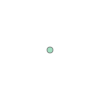

In [185]:
from shapely.geometry import Point
latitude = -23.56 	
longitude = -46.59
Point(longitude, latitude)

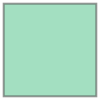

In [186]:
from shapely.geometry import Polygon
Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])

In [187]:
# ! serve para executar comando da maquina virtual
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [188]:
import geopandas as gpd

In [189]:
setor_censo = gpd.read_file("/content/drive/MyDrive/Alura - Imersao04/35SEE250GC_SIR.shp")
setor_censo.head()

ID       CD_GEOCODI    TIPO   CD_GEOCODS NM_SUBDIST CD_GEOCODD  \
0 $98,237.00  354100005000009  URBANO  35410000500       None  354100005   
1 $98,232.00  354100005000004  URBANO  35410000500       None  354100005   
2 $98,230.00  354100005000002  URBANO  35410000500       None  354100005   
3 $98,229.00  354100005000001  URBANO  35410000500       None  354100005   
4 $98,231.00  354100005000003  URBANO  35410000500       None  354100005   

     NM_DISTRIT CD_GEOCODM    NM_MUNICIP NM_MICRO                     NM_MESO  \
0  PRAIA GRANDE    3541000  PRAIA GRANDE   SANTOS  METROPOLITANA DE SÃO PAULO   
1  PRAIA GRANDE    3541000  PRAIA GRANDE   SANTOS  METROPOLITANA DE SÃO PAULO   
2  PRAIA GRANDE    3541000  PRAIA GRANDE   SANTOS  METROPOLITANA DE SÃO PAULO   
3  PRAIA GRANDE    3541000  PRAIA GRANDE   SANTOS  METROPOLITANA DE SÃO PAULO   
4  PRAIA GRANDE    3541000  PRAIA GRANDE   SANTOS  METROPOLITANA DE SÃO PAULO   

     CD_GEOCODB  NM_BAIRRO  ID1  \
0  354100005001  Boqueirão    1   
1  354100005001  Boqueirão    2   
2  354100005001  Boqueirão    3   
3  354100005001  Boqueirão    4   
4  354100005001  Boqueirão    5   

                                            geometry  
0  POLYGON ((-46.41024 -24.01103, -46.41169 -24.0...  
1  POLYGON ((-46.41606 -24.00245, -46.41598 -24.0...  
2  POLYGON ((-46.41213 -24.00792, -46.41244 -24.0...  
3  POLYGON ((-46.41134 -24.00552, -46.41196 -24.0...  
4  POLYGON ((-46.41326 -24.00514, -46.41484 -24.0...

In [190]:
setor_censo_sp = setor_censo[setor_censo.NM_MUNICIP == "SÃO PAULO"]
setor_censo_sp[setor_censo_sp.contains(Point(-46.63, -23.58))]

ID       CD_GEOCODI    TIPO   CD_GEOCODS NM_SUBDIST CD_GEOCODD  \
60986 $126,568.00  355030890000080  URBANO  35503089000       None  355030890   

         NM_DISTRIT CD_GEOCODM NM_MUNICIP   NM_MICRO  \
60986  VILA MARIANA    3550308  SÃO PAULO  SÃO PAULO   

                          NM_MESO CD_GEOCODB NM_BAIRRO    ID1  \
60986  METROPOLITANA DE SÃO PAULO       None      None  60987   

                                                geometry  
60986  POLYGON ((-46.62618 -23.58169, -46.62863 -23.5...

In [191]:
dados_geo["Point"] = ""
for i in dados_geo.index:
    dados_geo["Point"][i] = Point(dados_geo["longitude"][i], dados_geo["latitude"][i])

dados_geo['setor_censo'] = dados_geo["Point"][:10].map(
    lambda x: setor_censo_sp.loc[setor_censo_sp.contains(x), 'CD_GEOCODI'].values
).str[0]
dados_geo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Rua              Bairro     Cidade  \
0                Avenida Itacira, 255    Planalto Paulista  São Paulo   
5       Rua Aurelia Perez Alvarez, 42   Jardim dos Estados  São Paulo   
6                      Rua Alba Valdez     Jardim Reimberg  São Paulo   
7                                  NaN      Jardim Morumbi  São Paulo   
26            Rua Tobias Barreto, 195                Mooca  São Paulo   
...                                ...                 ...        ...   
101041                      Rua Tapuçu          Vila Sofia  São Paulo   
101042                   Rua Guararema     Bosque da Saúde  São Paulo   
101059               Rua Estero Belaco       Vila da Saúde  São Paulo   
101060         Rua Manuel Onha, , 514        Vila Oratório  São Paulo   
101061      Rua Barão de Tramandaí, 0          Vila Alpina  São Paulo   

        Metragem  Quartos  Banheiros  Vagas  Valor_Imoveis  Preco_M2  \
0           1000        4          8      6  $7,000,000.00 $7,000.00   
5            496        4          4      4  $3,700,000.00 $7,459.68   
6            125        4          3      2    $380,000.00 $3,040.00   
7            310        3          2      4    $685,000.00 $2,209.68   
26           100        3          2      2    $540,000.00 $5,400.00   
...          ...      ...        ...    ...            ...       ...   
101041        95        2          2      2    $665,000.00 $7,000.00   
101042       605        8          7      5  $2,300,000.00 $3,801.65   
101059       205        3          3      6  $1,050,000.00 $5,121.95   
101060       185        3          2      2      $2,200.00    $11.89   
101061       122        3          2      2    $270,000.00 $2,213.11   

                                       Valor                 Apenas_rua  \
0                               R$ 7.000.000            avenida itacira   
5                               R$ 3.700.000  rua aurelia perez alvarez   
6                                 R$ 380.000            rua alba valdez   
7                                 R$ 685.000                        NaN   
26                                R$ 540.000         rua tobias barreto   
...                                      ...                        ...   
101041                            R$ 665.000                 rua tapuçu   
101042                          R$ 2.300.000              rua guararema   
101059                          R$ 1.050.000          rua estero belaco   
101060  R$ 2.200\n                      /Mês            rua manuel onha   
101061                            R$ 270.000     rua barão de tramandaí   

                              rua            cep  latitude  longitude  \
0                 avenida itacira $11,443,160.00   $-23.98    $-46.20   
5       rua aurelia perez alvarez  $4,642,020.00   $-23.64    $-46.69   
6                 rua alba valdez  $4,845,200.00   $-23.75    $-46.70   
7                             NaN $18,125,000.00   $-23.53    $-47.26   
26             rua tobias barreto $13,474,663.00   $-22.70    $-47.29   
...                           ...            ...       ...        ...   
101041                 rua tapuçu  $4,671,185.00   $-23.66    $-46.69   
101042              rua guararema $13,030,640.00   $-22.92    $-47.08   
101059          rua estero belaco  $4,145,020.00   $-23.62    $-46.63   
101060            rua manuel onha  $3,192,100.00   $-23.57    $-46.58   
101061     rua barão de tramandaí  $3,207,000.00   $-23.60    $-46.56   

                                  Point      setor_censo  
0        POINT (-46.2013172 -23.975993)              NaN  
5       POINT (-46.6883114 -23.6409612)  355030871000023  
6         POINT (-46.6958895 -23.75299)  355030830000050  
7       POINT (-47.2550228 -23.5310431)              NaN  
26      POINT (-47.2944609 -22.6989009)              NaN  
...                                 ...              ...  
101041   POINT (-46.6915206 -23.661018)              NaN  
101042  POINT (-47.0769595 -22.9227492)    

In [192]:
dados_geo = pd.read_csv("/content/drive/MyDrive/Alura - Imersao04/dados_geo.csv")
dados_geo.head()

Rua              Bairro     Cidade  Metragem  \
0           Avenida Itacira, 255    Planalto Paulista  São Paulo      1000   
1  Rua Aurelia Perez Alvarez, 42   Jardim dos Estados  São Paulo       496   
2                 Rua Alba Valdez     Jardim Reimberg  São Paulo       125   
3        Rua Tobias Barreto, 195                Mooca  São Paulo       100   
4                 Rua Graham Bell         Santo Amaro  São Paulo       440   

   Quartos  Banheiros  Vagas         Valor  Valor_anuncio  Tipo_anuncio  \
0        4          8      6  R$ 7.000.000  $7,000,000.00           NaN   
1        4          4      4  R$ 3.700.000  $3,700,000.00           NaN   
2        4          3      2    R$ 380.000    $380,000.00           NaN   
3        3          2      2    R$ 540.000    $540,000.00           NaN   
4        4          4      6  R$ 1.980.000  $1,980,000.00           NaN   

   Valor_mm  Valor_m2                        rua           cep  latitude  \
0     $7.00 $7,000.00            Avenida Itacira $4,061,000.00   $-23.62   
1     $3.70 $7,459.68  Rua Aurelia Perez Alvarez $4,642,020.00   $-23.64   
2     $0.38 $3,040.00            Rua Alba Valdez $4,845,200.00   $-23.75   
3     $0.54 $5,400.00         Rua Tobias Barreto $3,176,000.00   $-23.55   
4     $1.98 $4,500.00            Rua Graham Bell $4,737,030.00   $-23.59   

   longitude                            Point             setor_censo  
0    $-46.65  POINT (-46.6481622 -23.6157934) $355,030,877,000,067.00  
1    $-46.69  POINT (-46.6883114 -23.6409612) $355,030,871,000,023.00  
2    $-46.70    POINT (-46.6958895 -23.75299) $355,030,830,000,050.00  
3    $-46.59  POINT (-46.5881729 -23.5499597) $355,030,808,000,050.00  
4    $-46.76  POINT (-46.7600773 -23.5937964) $355,030,865,000,169.00

In [193]:
dados_vendas_censo = pd.merge(left = dados_geo, right = ibge_sp, how = "left", left_on = "setor_censo", right_on = "Cod_setor")
dados_vendas_censo

Rua              Bairro     Cidade  Metragem  \
0              Avenida Itacira, 255    Planalto Paulista  São Paulo      1000   
1     Rua Aurelia Perez Alvarez, 42   Jardim dos Estados  São Paulo       496   
2                    Rua Alba Valdez     Jardim Reimberg  São Paulo       125   
3           Rua Tobias Barreto, 195                Mooca  São Paulo       100   
4                    Rua Graham Bell         Santo Amaro  São Paulo       440   
...                              ...                 ...        ...       ...   
5600                   Avenida Odila   Planalto Paulista  São Paulo       267   
5601                      Rua Tapuçu          Vila Sofia  São Paulo        95   
5602                   Rua Guararema     Bosque da Saúde  São Paulo       605   
5603               Rua Estero Belaco       Vila da Saúde  São Paulo       205   
5604      Rua Barão de Tramandaí, 0          Vila Alpina  São Paulo       122   

      Quartos  Banheiros  Vagas         Valor  Valor_anuncio  Tipo_anuncio  \
0           4          8      6  R$ 7.000.000  $7,000,000.00           NaN   
1           4          4      4  R$ 3.700.000  $3,700,000.00           NaN   
2           4          3      2    R$ 380.000    $380,000.00           NaN   
3           3          2      2    R$ 540.000    $540,000.00           NaN   
4           4          4      6  R$ 1.980.000  $1,980,000.00           NaN   
...       ...        ...    ...           ...            ...           ...   
5600        3          6      4  R$ 1.500.000  $1,500,000.00           NaN   
5601        2          2      2    R$ 665.000    $665,000.00           NaN   
5602        8          7      5  R$ 2.300.000  $2,300,000.00           NaN   
5603        3          3      6  R$ 1.050.000  $1,050,000.00           NaN   
5604        3          2      2    R$ 270.000    $270,000.00           NaN   

      ...  V003  V004      V005           V006      V007           V008  \
0     ... $2.66 $2.04 $3,158.96 $22,210,644.93 $5,570.65 $25,770,816.97   
1     ... $3.13 $1.96 $7,600.44 $36,778,930.17 $7,890.53 $35,886,906.64   
2     ... $3.47 $3.06   $805.13    $769,188.78 $1,011.75    $757,433.42   
3     ... $3.00 $1.99 $2,338.05  $7,826,370.15 $2,447.89  $7,925,839.76   
4     ... $3.51 $2.31 $1,026.36    $272,168.67 $1,143.96    $167,733.64   
...   ...   ...   ...       ...            ...       ...            ...   
5600  ... $2.81 $1.60 $4,249.33 $24,499,871.44 $5,180.14 $25,047,413.33   
5601  ... $2.99 $1.81 $2,425.09  $6,878,872.25 $2,543.80  $6,913,867.79   
5602  ...   NaN   NaN       NaN            NaN       NaN            NaN   
5603  ... $2.75 $1.50 $5,650.20 $20,344,622.14 $5,750.84 $20,127,679.27   
5604  ... $2.97 $1.75 $1,244.10  $1,353,001.23 $1,364.89  $1,319,336.96   

          V009           V010      V011           V012  
0    $2,096.19 $13,029,851.56 $3,930.35 $17,241,576.74  
1    $4,149.00 $26,760,682.90 $6,063.92 $27,502,674.90  
2      $518.77    $426,672.78   $858.51    $414,378.88  
3    $1,543.29  $4,646,566.16 $1,909.04  $5,050,712.69  
4      $735.67    $367,088.08 $1,086.94    $159,622.46  
...        ...            ...       ...            ...  
5600 $2,618.76 $17,705,032.31 $3,977.93 $21,495,997.85  
5601 $1,561.58  $4,261,814.01 $2,062.09  $4,596,759.57  
5602       NaN            NaN       NaN            NaN  
5603 $3,459.68 $16,021,825.60 $4,362.79 $16,264,378.33  
5604   $895.93    $988,708.13 $1,226.86    $947,807.31  

[5605 rows x 51 columns]

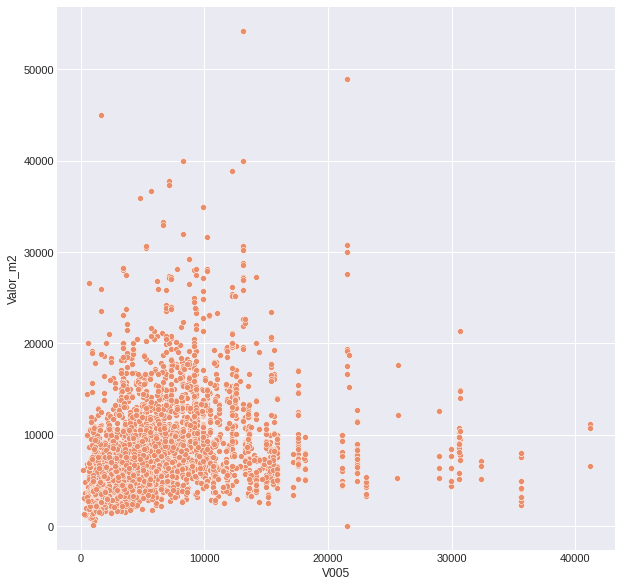

In [194]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = dados_vendas_censo, x="V005", y="Valor_m2")

In [195]:
dados_vendas_censo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5605 entries, 0 to 5604
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rua                    5605 non-null   object 
 1   Bairro                 5597 non-null   object 
 2   Cidade                 5605 non-null   object 
 3   Metragem               5605 non-null   int64  
 4   Quartos                5605 non-null   int64  
 5   Banheiros              5605 non-null   int64  
 6   Vagas                  5605 non-null   int64  
 7   Valor                  5605 non-null   object 
 8   Valor_anuncio          5605 non-null   float64
 9   Tipo_anuncio           0 non-null      float64
 10  Valor_mm               5605 non-null   float64
 11  Valor_m2               5605 non-null   float64
 12  rua                    5605 non-null   object 
 13  cep                    5605 non-null   float64
 14  latitude               5605 non-null   float64
 15  long

In [196]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set()

dados_censo = pd.read_csv("/content/drive/MyDrive/Alura - Imersao04/dados_vendas_censo.csv")
dados_censo = dados_censo[['Rua', 'Bairro', 'Cidade', 'Metragem', 'Quartos', 'Banheiros', 'Vagas',
       'Valor_anuncio', 'Valor_mm', 'Valor_m2', 'latitude', 'longitude', 'Situacao_setor', 'V001',
       'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010',
       'V011', 'V012']].dropna()
dados_censo

Rua              Bairro     Cidade  Metragem  \
0              Avenida Itacira, 255    Planalto Paulista  São Paulo      1000   
1     Rua Aurelia Perez Alvarez, 42   Jardim dos Estados  São Paulo       496   
2                    Rua Alba Valdez     Jardim Reimberg  São Paulo       125   
3           Rua Tobias Barreto, 195                Mooca  São Paulo       100   
4                    Rua Graham Bell         Santo Amaro  São Paulo       440   
...                              ...                 ...        ...       ...   
5599              Rua Pedro Teixeira        Vila Olímpia  São Paulo       157   
5600                   Avenida Odila   Planalto Paulista  São Paulo       267   
5601                      Rua Tapuçu          Vila Sofia  São Paulo        95   
5603               Rua Estero Belaco       Vila da Saúde  São Paulo       205   
5604      Rua Barão de Tramandaí, 0          Vila Alpina  São Paulo       122   

      Quartos  Banheiros  Vagas  Valor_anuncio  Valor_mm  Valor_m2  ...  V003  \
0           4          8      6     7000000.00      7.00   7000.00  ...  2.66   
1           4          4      4     3700000.00      3.70   7459.68  ...  3.13   
2           4          3      2      380000.00      0.38   3040.00  ...  3.47   
3           3          2      2      540000.00      0.54   5400.00  ...  3.00   
4           4          4      6     1980000.00      1.98   4500.00  ...  3.51   
...       ...        ...    ...            ...       ...       ...  ...   ...   
5599        3          2      2      960000.00      0.96   6114.65  ...  2.17   
5600        3          6      4     1500000.00      1.50   5617.98  ...  2.81   
5601        2          2      2      665000.00      0.67   7000.00  ...  2.99   
5603        3          3      6     1050000.00      1.05   5121.95  ...  2.75   
5604        3          2      2      270000.00      0.27   2213.11  ...  2.97   

      V004    V005        V006    V007        V008    V009        V010  \
0     2.04 3158.96 22210644.93 5570.65 25770816.97 2096.19 13029851.56   
1     1.96 7600.44 36778930.17 7890.53 35886906.64 4149.00 26760682.90   
2     3.06  805.13   769188.78 1011.75   757433.42  518.77   426672.78   
3     1.99 2338.05  7826370.15 2447.89  7925839.76 1543.29  4646566.16   
4     2.31 1026.36   272168.67 1143.96   167733.64  735.67   367088.08   
...    ...     ...         ...     ...         ...     ...         ...   
5599  1.27 5054.58 33245189.73 5231.93 33485189.78 3649.06 26562232.53   
5600  1.60 4249.33 24499871.44 5180.14 25047413.33 2618.76 17705032.31   
5601  1.81 2425.09  6878872.25 2543.80  6913867.79 1561.58  4261814.01   
5603  1.50 5650.20 20344622.14 5750.84 20127679.27 3459.68 16021825.60   
5604  1.75 1244.10  1353001.23 1364.89  1319336.96  895.93   988708.13   

        V011        V012  
0    3930.35 17241576.74  
1    6063.92 27502674.90  
2     858.51   414378.88  
3    1909.04  5050712.69  
4    1086.94   159622.46  
...      ...         ...  
5599 4551.66 29032823.35  
5600 3977.93 21495997.85  
5601 2062.09  4596759.57  
5603 4362.79 16264378.33  
5604 1226.86   947807.31  

[5308 rows x 25 columns]

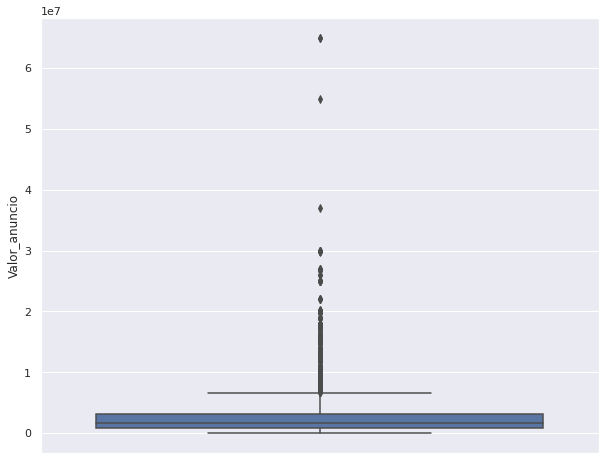

In [197]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas_censo, y="Valor_anuncio")
plt.show()

In [198]:
dados_vendas_censo.query("Valor_anuncio > 30000000 | Valor_anuncio < 100000")

Rua          Bairro     Cidade  Metragem  Quartos  \
54          Rua Inglaterra   Jardim Europa  São Paulo       200        3   
89          Rua Inglaterra   Jardim Europa  São Paulo       756        5   
1032  Praça Nicolau Scarpa  Jardim América  São Paulo      1200        4   
3521    Rua Estados Unidos  Jardim América  São Paulo      1816        4   
3896    Rua Estados Unidos  Jardim América  São Paulo      1200        4   

      Banheiros  Vagas          Valor  Valor_anuncio  Tipo_anuncio  ...  V003  \
54            3      2      R$ 13.000       13000.00           NaN  ...  3.13   
89            4     10  R$ 37.000.000    37000000.00           NaN  ...  3.13   
1032          4     25  R$ 65.000.000    65000000.00           NaN  ...  3.57   
3521         10     20  R$ 55.000.000    55000000.00           NaN  ...  3.57   
3896          6     24  R$ 65.000.000    65000000.00           NaN  ...  3.57   

      V004     V005          V006     V007          V008     V009  \
54    2.87 21545.71 1577883376.43 26081.65 1794039881.36 11050.67   
89    2.87 21545.71 1577883376.43 26081.65 1794039881.36 11050.67   
1032  3.01 13131.61  508165993.72 14507.30  541764826.89  7934.91   
3521  3.01 13131.61  508165993.72 14507.30  541764826.89  7934.91   
3896  3.01 13131.61  508165993.72 14507.30  541764826.89  7934.91   

             V010     V011          V012  
54   882338714.47 15470.93 1168079134.43  
89   882338714.47 15470.93 1168079134.43  
1032 364776324.15 10168.24  445001716.57  
3521 364776324.15 10168.24  445001716.57  
3896 364776324.15 10168.24  445001716.57  

[5 rows x 51 columns]

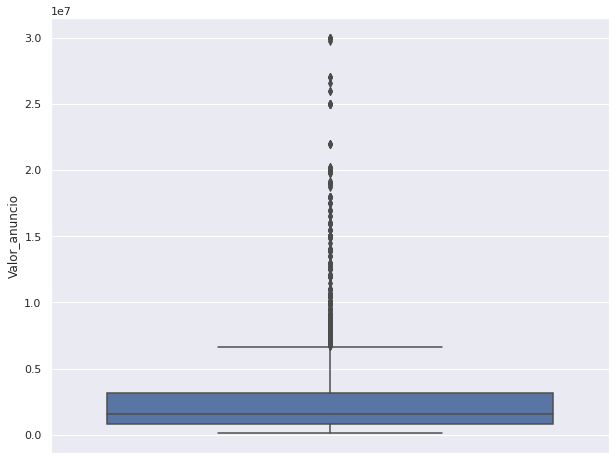

In [199]:
dados_vendas_censo.drop(dados_vendas_censo.query("Valor_anuncio > 30000000 | Valor_anuncio < 100000").index, inplace = True)
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas_censo, y="Valor_anuncio")
plt.show()

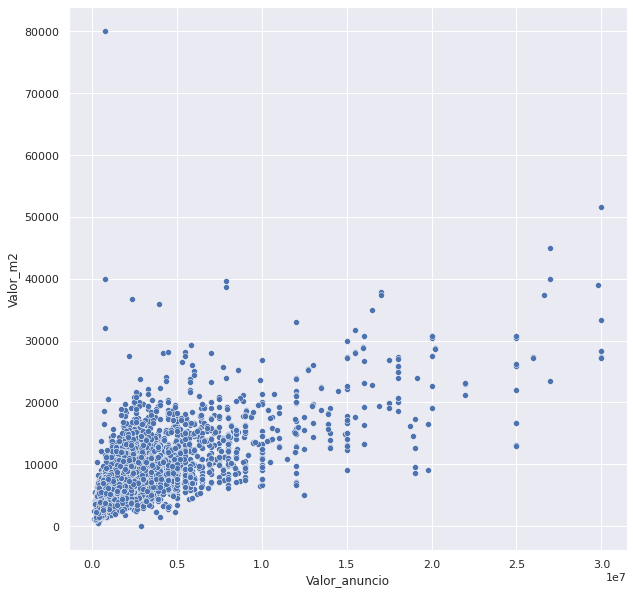

In [200]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = dados_vendas_censo, x="Valor_anuncio", y="Valor_m2")

# **Aula 04**

Desafio 01 - Realizar uma análise dos dados do IBGE por mapa, analisando a distribuição de renda (https://medium.com/creditas-tech/dados-georreferenciados-explora%C3%A7%C3%A3o-e-visualiza%C3%A7%C3%A3o-com-python-edd51e7c53da)
 - 

In [201]:
#Shapefiles são os arquivos de armazenamento de dados geográficos
setores_censitarios = gpd.read_file("/content/drive/MyDrive/Alura - Imersao04/35SEE250GC_SIR.shp")
setores_censitarios.info()

#CD_GEOCODD - código do setor censitário
setores_censitarios["CD_GEOCODD"] = setores_censitarios["CD_GEOCODD"].astype(float)


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 68296 entries, 0 to 68295
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          68296 non-null  float64 
 1   CD_GEOCODI  68296 non-null  object  
 2   TIPO        68296 non-null  object  
 3   CD_GEOCODS  68296 non-null  object  
 4   NM_SUBDIST  0 non-null      object  
 5   CD_GEOCODD  68296 non-null  object  
 6   NM_DISTRIT  68296 non-null  object  
 7   CD_GEOCODM  68296 non-null  object  
 8   NM_MUNICIP  68296 non-null  object  
 9   NM_MICRO    68296 non-null  object  
 10  NM_MESO     68296 non-null  object  
 11  CD_GEOCODB  18797 non-null  object  
 12  NM_BAIRRO   18797 non-null  object  
 13  ID1         68296 non-null  int64   
 14  geometry    68296 non-null  geometry
dtypes: float64(1), geometry(1), int64(1), object(12)
memory usage: 7.8+ MB


In [202]:
#Filtrar pela cidade de Sâo Paulo
setores_censitarios_sao_paulo = setores_censitarios.query("NM_MUNICIP == 'SÃO PAULO'")
setores_censitarios_sao_paulo

ID       CD_GEOCODI    TIPO   CD_GEOCODS NM_SUBDIST   CD_GEOCODD  \
42322 109347.00  355030804000079  URBANO  35503080400       None 355030804.00   
42323 109348.00  355030804000080  URBANO  35503080400       None 355030804.00   
42324 109349.00  355030804000081  URBANO  35503080400       None 355030804.00   
42325 109350.00  355030804000082  URBANO  35503080400       None 355030804.00   
42326 109351.00  355030804000083  URBANO  35503080400       None 355030804.00   
...         ...              ...     ...          ...        ...          ...   
62380 127887.00  355030896000243  URBANO  35503089600       None 355030896.00   
62381 127888.00  355030896000244  URBANO  35503089600       None 355030896.00   
62382 127889.00  355030896000245  URBANO  35503089600       None 355030896.00   
62383 127890.00  355030896000246  URBANO  35503089600       None 355030896.00   
62384 127891.00  355030896000247  URBANO  35503089600       None 355030896.00   

       NM_DISTRIT CD_GEOCODM NM_MUNICIP   NM_MICRO  \
42322  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO   
42323  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO   
42324  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO   
42325  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO   
42326  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO   
...           ...        ...        ...        ...   
62380     LAJEADO    3550308  SÃO PAULO  SÃO PAULO   
62381     LAJEADO    3550308  SÃO PAULO  SÃO PAULO   
62382     LAJEADO    3550308  SÃO PAULO  SÃO PAULO   
62383     LAJEADO    3550308  SÃO PAULO  SÃO PAULO   
62384     LAJEADO    3550308  SÃO PAULO  SÃO PAULO   

                          NM_MESO CD_GEOCODB NM_BAIRRO    ID1  \
42322  METROPOLITANA DE SÃO PAULO       None      None  42323   
42323  METROPOLITANA DE SÃO PAULO       None      None  42324   
42324  METROPOLITANA DE SÃO PAULO       None      None  42325   
42325  METROPOLITANA DE SÃO PAULO       None      None  42326   
42326  METROPOLITANA DE SÃO PAULO       None      None  42327   
...                           ...        ...       ...    ...   
62380  METROPOLITANA DE SÃO PAULO       None      None  62381   
62381  METROPOLITANA DE SÃO PAULO       None      None  62382   
62382  METROPOLITANA DE SÃO PAULO       None      None  62383   
62383  METROPOLITANA DE SÃO PAULO       None      None  62384   
62384  METROPOLITANA DE SÃO PAULO       None      None  62385   

                                                geometry  
42322  POLYGON ((-46.51778 -23.57947, -46.51786 -23.5...  
42323  POLYGON ((-46.51888 -23.57967, -46.51908 -23.5...  
42324  POLYGON ((-46.52015 -23.58105, -46.52026 -23.5...  
42325  POLYGON ((-46.52140 -23.57992, -46.52144 -23.5...  
42326  POLYGON ((-46.52371 -23.58185, -46.52384 -23.5...  
...                                                  ...  
62380  POLYGON ((-46.38853 -23.54385, -46.38852 -23.5...  
62381  POLYGON ((-46.38810 -23.54514, -46.38810 -23.5...  
62382  POLYGON ((-46.42363 -23.52079, -46.42341 -23.5...  
62383  POLYGON ((-46.42242 -23.52122, -46.42209 -23.5...  
62384  POLYGON ((-46.39705 -23.54418, -46.39704 -23.5...  

[18953 rows x 15 columns]

In [203]:
#Merge entre os setores censitarios e os dados das vendas + dados do censo
geo_data_sao_paulo = pd.merge(left= setores_censitarios_sao_paulo, right = dados_vendas_censo[["Cod_distrito", "V005", "Valor_anuncio", "Valor_m2"]], how="left", left_on="CD_GEOCODD", right_on="Cod_distrito").drop_duplicates(subset = setores_censitarios_sao_paulo.columns)
geo_data_sao_paulo.head(5)

ID       CD_GEOCODI    TIPO   CD_GEOCODS NM_SUBDIST   CD_GEOCODD  \
0   109347.00  355030804000079  URBANO  35503080400       None 355030804.00   
25  109348.00  355030804000080  URBANO  35503080400       None 355030804.00   
50  109349.00  355030804000081  URBANO  35503080400       None 355030804.00   
75  109350.00  355030804000082  URBANO  35503080400       None 355030804.00   
100 109351.00  355030804000083  URBANO  35503080400       None 355030804.00   

     NM_DISTRIT CD_GEOCODM NM_MUNICIP   NM_MICRO                     NM_MESO  \
0    ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  METROPOLITANA DE SÃO PAULO   
25   ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  METROPOLITANA DE SÃO PAULO   
50   ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  METROPOLITANA DE SÃO PAULO   
75   ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  METROPOLITANA DE SÃO PAULO   
100  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  METROPOLITANA DE SÃO PAULO   

    CD_GEOCODB NM_BAIRRO    ID1  \
0         None      None  42323   
25        None      None  42324   
50        None      None  42325   
75        None      None  42326   
100       None      None  42327   

                                              geometry  Cod_distrito    V005  \
0    POLYGON ((-46.51778 -23.57947, -46.51786 -23.5...  355030804.00 1785.75   
25   POLYGON ((-46.51888 -23.57967, -46.51908 -23.5...  355030804.00 1785.75   
50   POLYGON ((-46.52015 -23.58105, -46.52026 -23.5...  355030804.00 1785.75   
75   POLYGON ((-46.52140 -23.57992, -46.52144 -23.5...  355030804.00 1785.75   
100  POLYGON ((-46.52371 -23.58185, -46.52384 -23.5...  355030804.00 1785.75   

     Valor_anuncio  Valor_m2  
0        600000.00   4000.00  
25       600000.00   4000.00  
50       600000.00   4000.00  
75       600000.00   4000.00  
100      600000.00   4000.00

In [204]:
#Nome da cidade deve ser índice no geopandas

cidade_sao_paulo = geo_data_sao_paulo.query("NM_MUNICIP == 'SÃO PAULO'").reset_index(drop = True)
cidade_sao_paulo.rename(columns = {"V005":"Renda_Media"}, inplace = True)
cidade_sao_paulo.head(10)

ID       CD_GEOCODI    TIPO   CD_GEOCODS NM_SUBDIST   CD_GEOCODD  \
0 109347.00  355030804000079  URBANO  35503080400       None 355030804.00   
1 109348.00  355030804000080  URBANO  35503080400       None 355030804.00   
2 109349.00  355030804000081  URBANO  35503080400       None 355030804.00   
3 109350.00  355030804000082  URBANO  35503080400       None 355030804.00   
4 109351.00  355030804000083  URBANO  35503080400       None 355030804.00   
5 109352.00  355030804000084  URBANO  35503080400       None 355030804.00   
6 109353.00  355030804000085  URBANO  35503080400       None 355030804.00   
7 109354.00  355030804000086  URBANO  35503080400       None 355030804.00   
8 109355.00  355030804000087  URBANO  35503080400       None 355030804.00   
9 109356.00  355030804000088  URBANO  35503080400       None 355030804.00   

   NM_DISTRIT CD_GEOCODM NM_MUNICIP   NM_MICRO                     NM_MESO  \
0  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  METROPOLITANA DE SÃO PAULO   
1  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  METROPOLITANA DE SÃO PAULO   
2  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  METROPOLITANA DE SÃO PAULO   
3  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  METROPOLITANA DE SÃO PAULO   
4  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  METROPOLITANA DE SÃO PAULO   
5  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  METROPOLITANA DE SÃO PAULO   
6  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  METROPOLITANA DE SÃO PAULO   
7  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  METROPOLITANA DE SÃO PAULO   
8  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  METROPOLITANA DE SÃO PAULO   
9  ARICANDUVA    3550308  SÃO PAULO  SÃO PAULO  METROPOLITANA DE SÃO PAULO   

  CD_GEOCODB NM_BAIRRO    ID1  \
0       None      None  42323   
1       None      None  42324   
2       None      None  42325   
3       None      None  42326   
4       None      None  42327   
5       None      None  42328   
6       None      None  42329   
7       None      None  42330   
8       None      None  42331   
9       None      None  42332   

                                            geometry  Cod_distrito  \
0  POLYGON ((-46.51778 -23.57947, -46.51786 -23.5...  355030804.00   
1  POLYGON ((-46.51888 -23.57967, -46.51908 -23.5...  355030804.00   
2  POLYGON ((-46.52015 -23.58105, -46.52026 -23.5...  355030804.00   
3  POLYGON ((-46.52140 -23.57992, -46.52144 -23.5...  355030804.00   
4  POLYGON ((-46.52371 -23.58185, -46.52384 -23.5...  355030804.00   
5  POLYGON ((-46.52760 -23.57420, -46.52761 -23.5...  355030804.00   
6  POLYGON ((-46.52897 -23.57221, -46.52905 -23.5...  355030804.00   
7  POLYGON ((-46.52684 -23.57189, -46.52706 -23.5...  355030804.00   
8  POLYGON ((-46.50207 -23.58021, -46.50207 -23.5...  355030804.00   
9  POLYGON ((-46.50394 -23.58143, -46.50396 -23.5...  355030804.00   

   Renda_Media  Valor_anuncio  Valor_m2  
0      1785.75      600000.00   4000.00  
1      1785.75      600000.00   4000.00  
2      1785.75      600000.00   4000.00  
3      1785.75      600000.00   4000.00  
4      1785.75      600000.00   4000.00  
5      1785.75      600000.00   4000.00  
6      1785.75      600000.00   4000.00  
7      1785.75      600000.00   4000.00  
8      1785.75      600000.00   4000.00  
9      1785.75      600000.00   4000.00

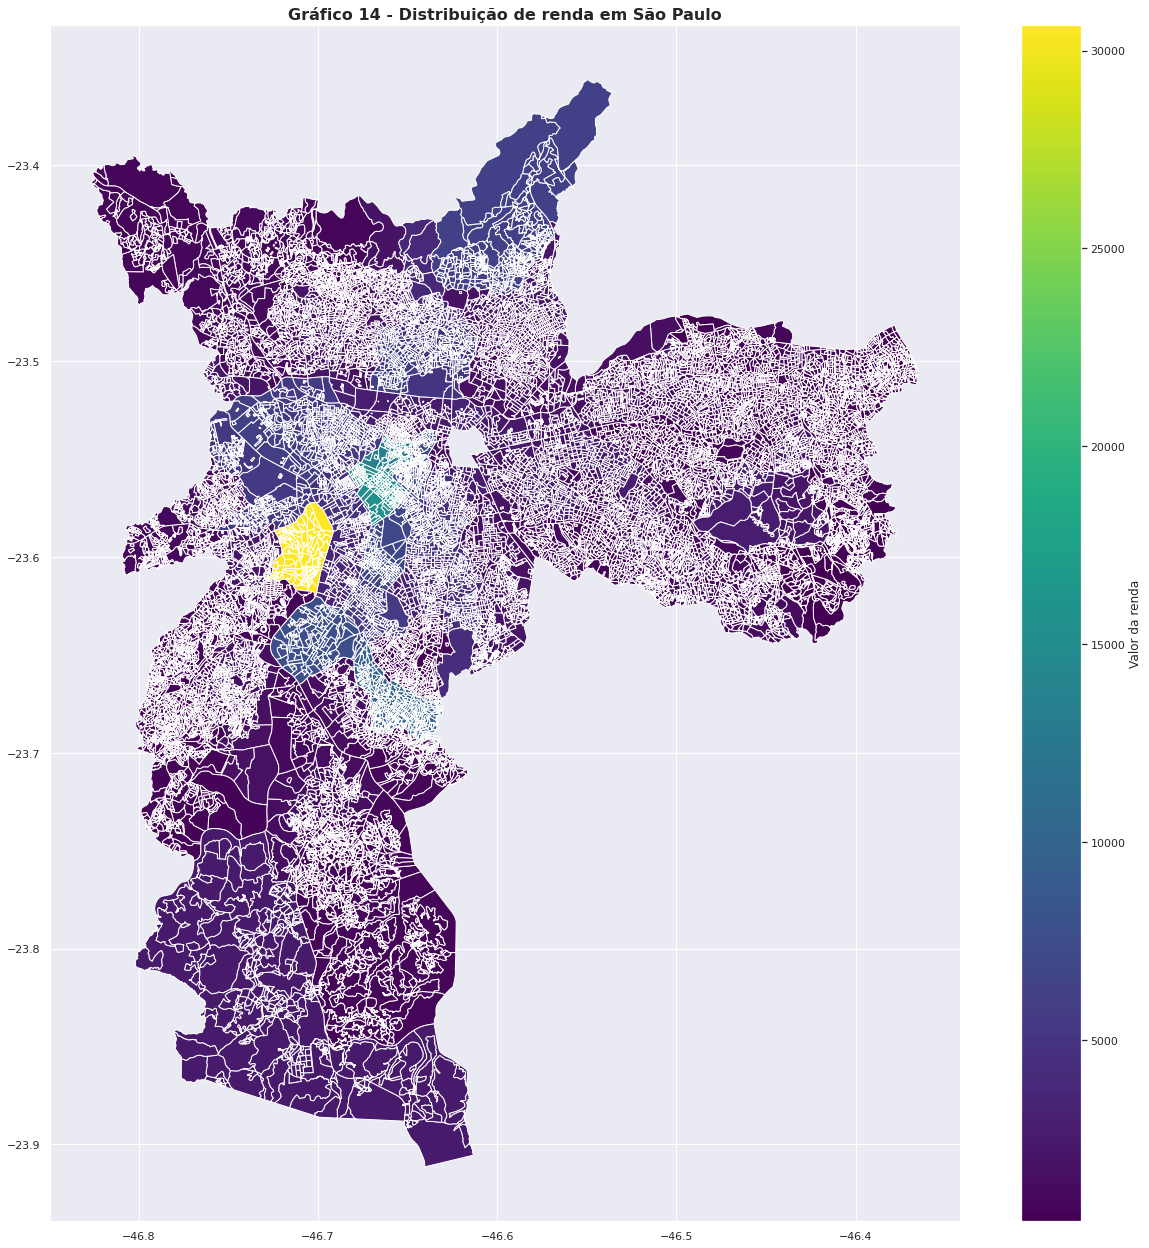

In [211]:
#Gráfico da distribuição de renda em Sâo Paulo

axe_sao_paulo = cidade_sao_paulo.plot(figsize=(25,35), column="Renda_Media", legend = True, cmap='viridis', legend_kwds = {'label': "Valor da renda",
                        'orientation': "vertical"})
axe_sao_paulo.set_title("Gráfico 14 - Distribuição de renda em São Paulo", fontdict={'fontsize':16,'weight':'bold'})
axe_sao_paulo.figure.set_size_inches(22,22)

In [206]:
!pip install git+https://github.com/python-visualization/folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/python-visualization/folium to /tmp/pip-req-build-krbfgl_z
  Running command git clone -q https://github.com/python-visualization/folium /tmp/pip-req-build-krbfgl_z
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [207]:
! pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [208]:
cidade_sao_paulo.explore(column = "Renda_Media", tooltip = "Renda_Media")

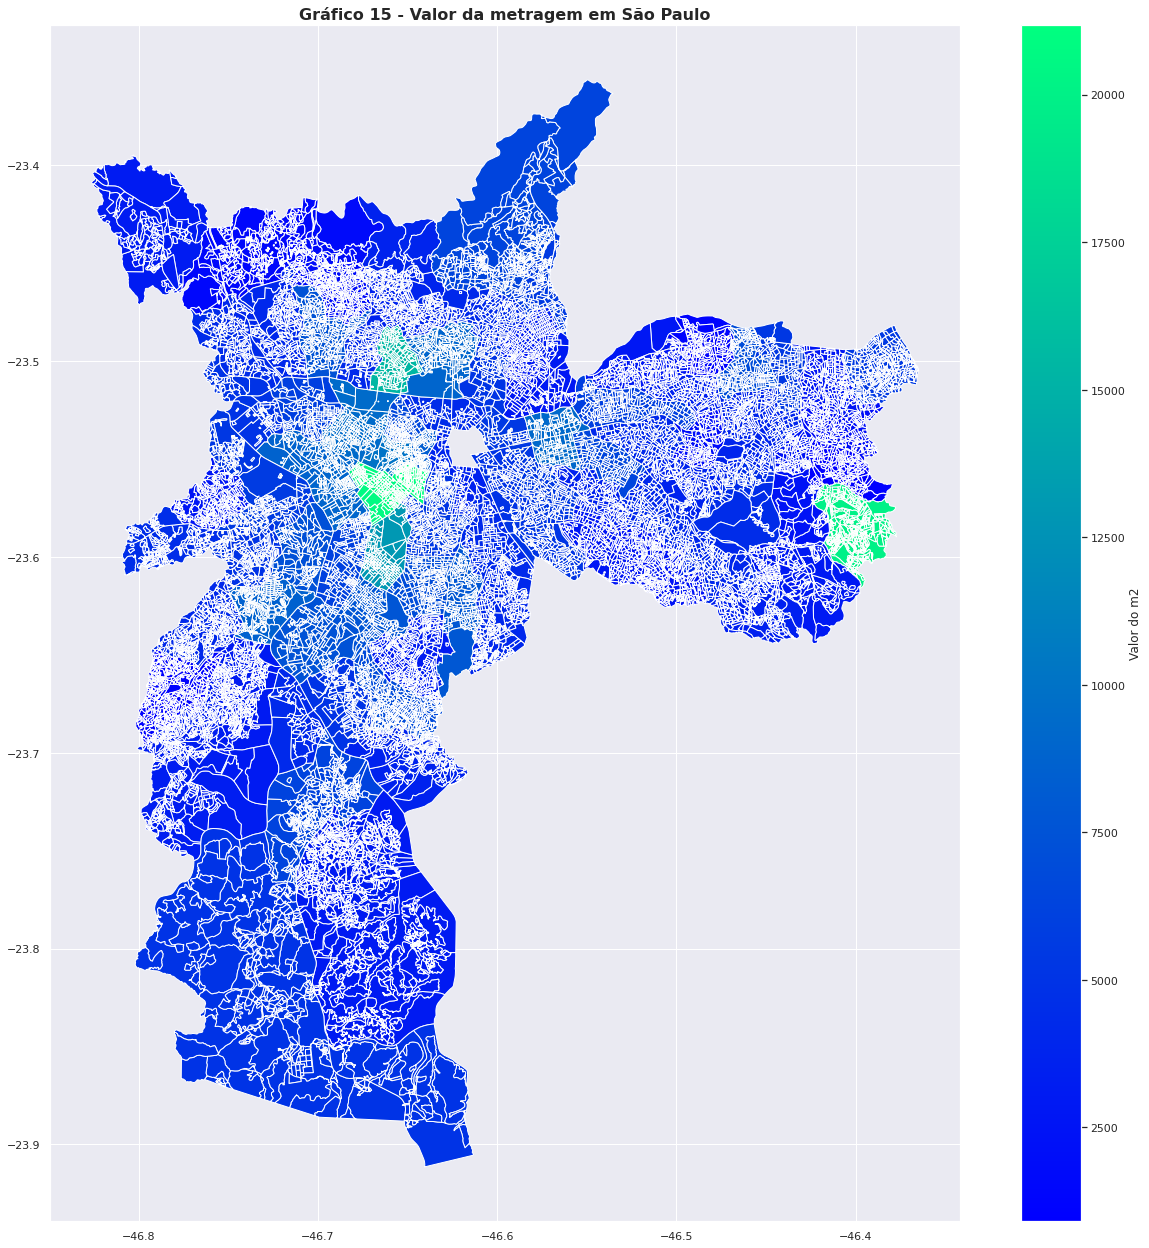

In [212]:
#Gráfico da distribuição do valor da metragem de imóveis para venda em Sâo Paulo

axe_sao_paulo = cidade_sao_paulo.plot(figsize=(25,35), column="Valor_m2", legend = True, cmap='winter', legend_kwds = {'label': "Valor do m2",
                        'orientation': "vertical"})
axe_sao_paulo.set_title("Gráfico 15 - Valor da metragem em São Paulo", fontdict={'fontsize':16,'weight':'bold'})
axe_sao_paulo.figure.set_size_inches(22,22)

**Desafio 02** - Repassar a aula para entender melhor o que foi realizado

**Desafio 03** - Aprofundar a análise entre dados de vendas e renda.

Conforme gráficos 14 (Distribuição de renda em São Paulo) e 15 (Valor da metragem em São Paulo), os bairros/localizações com famílias com maior concentração de renda não necessariamente implicam em preço da metragem mais caros. 

**Desafio 04** - Realizar a análise exploratória e encontrar variáveis relevantes para solução do problema.

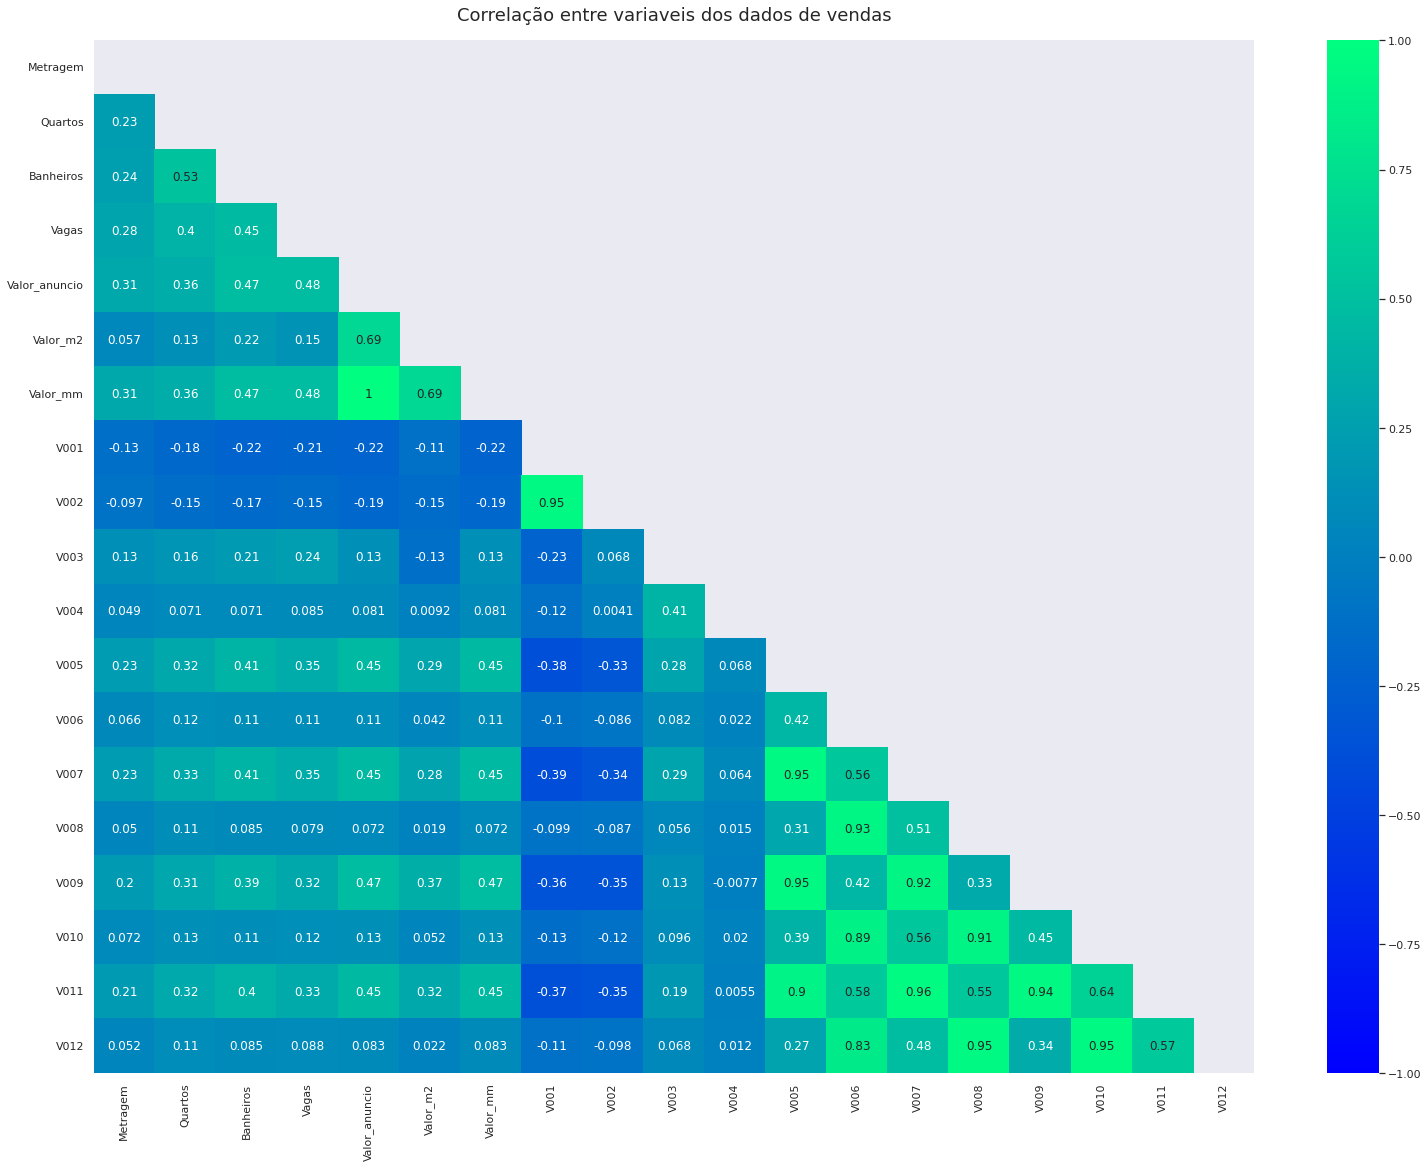

In [220]:
#Analise exploratoria
dados_analise_exploratoria = dados_vendas_censo[["Metragem","Quartos","Banheiros","Vagas","Valor_anuncio","Valor_m2","Valor_mm", "V001","V002","V003","V004","V005","V006","V007","V008","V009","V010","V011","V012"]]

plt.figure(figsize=(21, 12))
mask = np.triu(np.ones_like(dados_analise_exploratoria.corr(), dtype=bool))
heatmap = sns.heatmap(dados_analise_exploratoria.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='winter')
heatmap.set_title("Correlação entre variaveis dos dados de vendas", fontdict={'fontsize':18}, pad=20);
heatmap.figure.set_size_inches(26,19)